In [179]:
import pandas as pd
import sqlite3
import chess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [180]:
connection = sqlite3.connect('chess_games.db')
cursor = connection.cursor()

In [181]:
#Extract the dataset
cursor.execute('''SELECT game_id, move, move_number FROM moves
               LIMIT 1000000
               ;''')
moves = cursor.fetchall()
moves_df = pd.DataFrame(moves, columns=['game_id', 'move', 'move_number'])
moves = moves_df.groupby('game_id')['move'].apply(list).to_numpy()
print(moves[:10])
print(f"shape: {moves.shape}")

[list(['d2d4', 'f7f5', 'g2g3', 'g7g6', 'f1g2', 'f8g7', 'g1f3', 'd7d6', 'c2c3', 'e7e6', 'a2a4', 'g8f6', 'd1c2', 'd8e7', 'b1d2', 'e6e5', 'd4e5', 'd6e5', 'e2e4', 'b8c6', 'e1g1', 'f5e4', 'd2e4', 'c8f5', 'f3d2', 'e8c8', 'b2b4', 'g7h6', 'f1e1', 'h6d2', 'c1d2', 'f6e4', 'g2e4', 'e7e6', 'd2g5', 'd8d6', 'a1d1', 'd6d1', 'e1d1', 'h7h6', 'g5e3', 'a7a5', 'c2b1', 'h6h5', 'b4b5', 'c6e7', 'e3g5', 'h8e8', 'h2h4', 'e6c4', 'd1e1', 'f5e4', 'e1e4', 'c4e6', 'g5f4', 'e6f5', 'f4e5', 'e7d5', 'b1e1', 'd5b6', 'f2f4', 'b6d7', 'e1e2', 'b7b6', 'e4e3', 'e8e7', 'e3e4', 'd7c5', 'e4d4', 'e7d7', 'g1g2', 'c8d8', 'g2h2', 'd8c8', 'e2g2', 'c8b8', 'g2a2', 'b8a7', 'a2g2', 'a7b8', 'g2e2', 'b8c8', 'e2f3', 'c8b8', 'f3d1', 'b8c8', 'd1e2', 'c8b8', 'e2d1', 'b8b7', 'd4d7', 'c5d7', 'e5d4', 'd7c5', 'h2g2', 'f5d5', 'g2g1', 'd5f5', 'd4c5', 'f5c5', 'd1d4', 'c5f5', 'd4d2', 'f5b1', 'g1f2', 'b1b3', 'd2d4', 'b3c2', 'f2e3', 'b7c8', 'd4h8', 'c8b7', 'h8d4', 'b7b8', 'd4d8', 'b8b7', 'd8d5', 'b7b8', 'd5g8', 'b8b7', 'g8c4', 'b7b8', 'c4g8', 'b8b7', '

In [201]:
class MovePlotter:
    def __init__(self, title: str):
        self.reset()
        self.title = title
        self.moves = []
        self.board = chess.Board("8/8/8/8/8/8/8/8 w - - 0 1")  # Empty board

    def moveToIndex(self, move: str):
        return ord(move[0]) - ord('a'), 8 - int(move[1])

    def addMove(self, move: str):
        fromSquare = chess.parse_square(move[:2])
        toSquare = chess.parse_square(move[2:4])
        self.moves.append((fromSquare, toSquare))

    def plot(self):
        # Plot the "from-to" distributions
        from_squares = [move[0] for move in self.moves]
        to_squares = [move[1] for move in self.moves]

        from_ranks, from_files = zip(*[divmod(square, 8) for square in from_squares])
        to_ranks, to_files = zip(*[divmod(square, 8) for square in to_squares])

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        fig.suptitle(self.title)

        # From-square distribution
        # Accumulate moves in an array
        from_square_counts = np.zeros((8, 8), dtype=int)
        to_square_counts = np.zeros((8, 8), dtype=int)

        for rank, file in zip(from_ranks, from_files):
            from_square_counts[rank, file] += 1

        for rank, file in zip(to_ranks, to_files):
            to_square_counts[rank, file] += 1

        # From-square distribution
        axes[0].imshow(from_square_counts, cmap="Blues", origin="upper")
        axes[0].set_title("From-Square Distribution")
        axes[0].set_xlabel("File")
        axes[0].set_ylabel("Rank")
        axes[0].set_xticks(range(8))
        axes[0].set_xticklabels([chr(i + ord('a')) for i in range(8)])
        axes[0].set_yticks(range(8))
        axes[0].set_yticklabels([str(i + 1) for i in range(8)])
        #flip y-axis to match chessboard coordinates
        axes[0].invert_yaxis()
        axes[0].set_aspect('equal')

        # To-square distribution
        axes[1].imshow(to_square_counts, cmap="Reds", origin="upper")
        axes[1].set_title("To-Square Distribution")
        axes[1].set_xlabel("File")
        axes[1].set_ylabel("Rank")
        axes[1].set_xticks(range(8))
        axes[1].set_xticklabels([chr(i + ord('a')) for i in range(8)])
        axes[1].set_yticks(range(8))
        axes[1].set_yticklabels([str(i + 1) for i in range(8)])
        #flip y-axis to match chessboard coordinates
        axes[1].invert_yaxis()
        axes[1].set_aspect('equal')

        plt.tight_layout()
        plt.show()

        # Plot the chessboard with arrows
        arrows = [chess.svg.Arrow(from_sq, to_sq, color="#0000cc55") for from_sq, to_sq in self.moves]
        svg_board = chess.svg.board(
            self.board,
            arrows=arrows,
            size=350
        )
        display(SVG(svg_board))

    def reset(self):
        self.moves = []
        self.board = chess.Board("8/8/8/8/8/8/8/8 w - - 0 1")  # Reset to empty board


move: d2d4
moveVec: (3, 6) (3, 4)


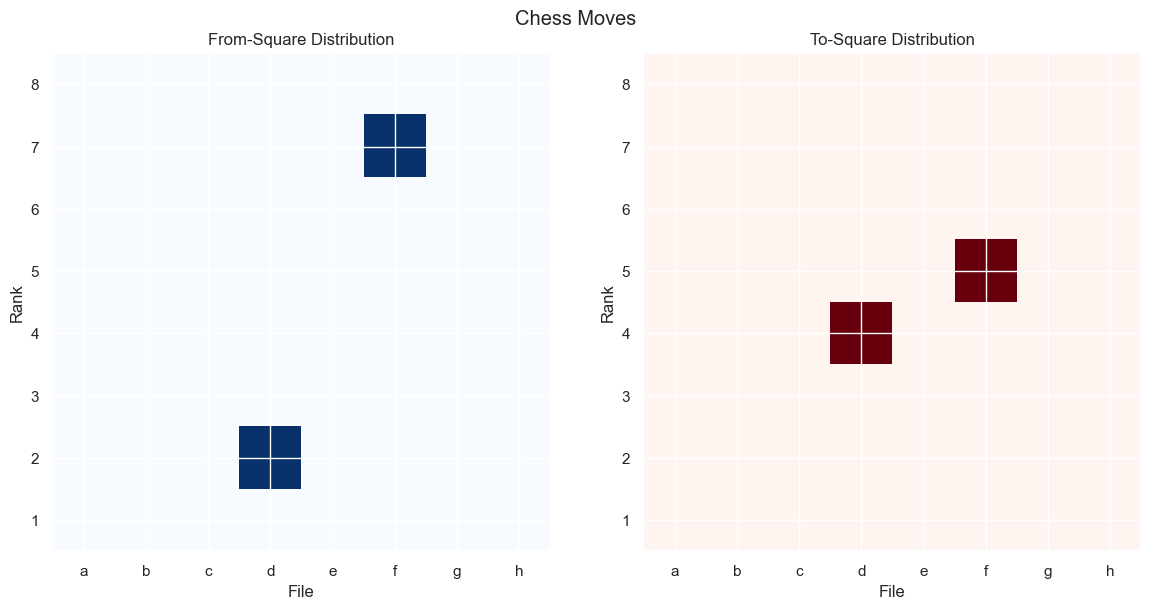

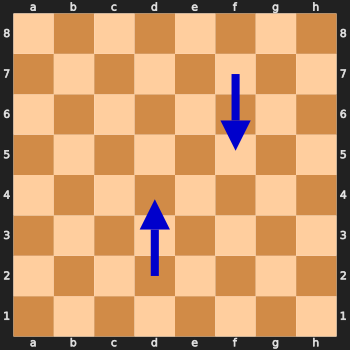

In [202]:
plotter = MovePlotter("Chess Moves")
plotter.addMove(moves[0][0])
plotter.addMove(moves[0][1])
print("move:", moves[0][0])
print("moveVec:", plotter.moveToIndex(moves[0][0][:2]), plotter.moveToIndex(moves[0][0][2:4]))
plotter.plot()

In [184]:
from gensim.models.word2vec import Word2Vec

In [185]:
model = Word2Vec(moves, vector_size=100, min_count=5, window=10, sg=1)
wordVectors = model.wv.vectors
wordVectors.shape

(1829, 100)

In [186]:
#Print the model dictionary
dictionaty = np.array(model.wv.index_to_key)
vectors = model.wv.vectors
print(f'Vectors shape: {vectors.shape}')
vectorsNormalized = vectors / np.linalg.norm(vectors, axis=1, keepdims=True)
startingLetter = [ord(move[3]) for move in dictionaty]
print(startingLetter[:10])

Vectors shape: (1829, 100)
[52, 51, 54, 54, 56, 54, 51, 49, 52, 51]


In [242]:
import chess
import chess.svg
from IPython.display import display, SVG
import ipywidgets as widgets
from cairosvg import svg2png

# Load your Word2Vec model (assuming it's already trained)
# Replace 'model' with your trained Word2Vec model
# model = Word2Vec.load("path_to_your_model")  # Update with the correct path

# Initialize a chess board
board = chess.Board()

boardSize = 350
nSimilarMoves = 5

board_svg = chess.svg.board(board=board, size=boardSize)
# Convert the SVG to PNG
board_png = svg2png(bytestring=board_svg)
boardDisplayWidget = widgets.Image(format='png', value=board_png, width=boardSize, height=boardSize)
boardDisplayWidget.layout.width = f"{boardSize}px"
boardDisplayWidget.layout.height = f"{boardSize}px"


# Display the initial board
display(boardDisplayWidget)


# Function to display the chess board
def display_board():
    board_svg = chess.svg.board(board=board, size=boardSize)
    board_png = svg2png(bytestring=board_svg)
    boardDisplayWidget.value = board_png

def displayMove(move):
    #Display the move as an arrow on the board
    fromSquare = chess.parse_square(move[:2])
    toSquare = chess.parse_square(move[2:4])
    board_svg = chess.svg.board(board=board, size=boardSize, arrows=[(fromSquare, toSquare)])
    board_png = svg2png(bytestring=board_svg)
    boardDisplayWidget.value = board_png


# Function to find the most similar move
def find_similar_move(move):
    if move in model.wv:
        similar_moves = model.wv.most_similar(move, topn=nSimilarMoves)
        return similar_moves  # Return the most similar move
    else:
        return "Move not in vocabulary"
    
def displayMostSimilarMoves(move, mostSimilarMoves):
    output.clear_output()
    with output:
        if isinstance(mostSimilarMoves, str):
                print(mostSimilarMoves)
        else:
            print(f"Most similar moves:")
            for move_, similarity in mostSimilarMoves:
                print(f"\t{move_}: {similarity:.2f}")

    # Display the current move as a green arrow and the most similar moves as blue arrows
    fromSquare = chess.parse_square(move[:2])
    toSquare = chess.parse_square(move[2:4])
    moveArrow = chess.svg.Arrow(fromSquare, toSquare, color="rgba(0, 255, 0, 0.5)")

    arrows = []
    for similar_move, _ in mostSimilarMoves:
        fromSquare = chess.parse_square(similar_move[:2])
        toSquare = chess.parse_square(similar_move[2:4])
        opacity = max(0.1, min(1.0, similarity))  # Ensure opacity is between 0.1 and 1.0
        arrows.append(chess.svg.Arrow(fromSquare, toSquare, color=f"rgba(0, 0, 255, {opacity})"))

    arrows.append(moveArrow)  # Add the current move arrow

    board_svg = chess.svg.board(board=board, size=boardSize, arrows=arrows)
    board_png = svg2png(bytestring=board_svg)
    boardDisplayWidget.value = board_png

# Function to handle user input
def on_move(change):
    move = move_input.value
    try:
        # # Perform the move on the board
        # board.push_uci(move)
        # display_board()
        
        # Find and display the most similar move
        if move in model.wv:
            similar_move = find_similar_move(move)
            displayMostSimilarMoves(move, similar_move)
    except ValueError:
        output.clear_output()
        with output:
            print("Invalid move. Please try again.")

# Function to handle the make move button click
def on_make_move_button_click(button):
    move = move_input.value
    try:
        # Perform the move on the board
        board.push_uci(move)

        if move in model.wv:
            similar_move = find_similar_move(move)
            displayMostSimilarMoves(move, similar_move)
    except ValueError:
        output.clear_output()
        with output:
            print("Invalid move. Please try again.")
    display_board()
    

# Create a text input widget for entering moves
move_input = widgets.Text(
    description="Move:",
    placeholder="e.g., e2e4",
)

# Attach the event handler to the text input
move_input.observe(on_move, names="value")

# Create a button widget for making moves
make_move_button = widgets.Button(description="Make Move")
make_move_button.on_click(on_make_move_button_click)

# Create an output widget for displaying results
output = widgets.Output()

# Display the widgets
display(move_input, make_move_button, output)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01^\x00\x00\x01^\x08\x06\x00\x00\x00\xcd+w\x1a\x00\…

Text(value='', description='Move:', placeholder='e.g., e2e4')

Button(description='Make Move', style=ButtonStyle())

Output()

In [188]:
model.wv.most_similar('a2a3', topn=10)

[('e2e3', 0.5688408613204956),
 ('a2a4', 0.5619376301765442),
 ('e1g1', 0.5589734315872192),
 ('f2f3', 0.5485844612121582),
 ('a1a3', 0.5432841777801514),
 ('a5a3', 0.5388561487197876),
 ('a4a3', 0.53537517786026),
 ('g2g3', 0.533586859703064),
 ('f1d3', 0.5273882150650024),
 ('a1c1', 0.5262824296951294)]

(1829, 1829)


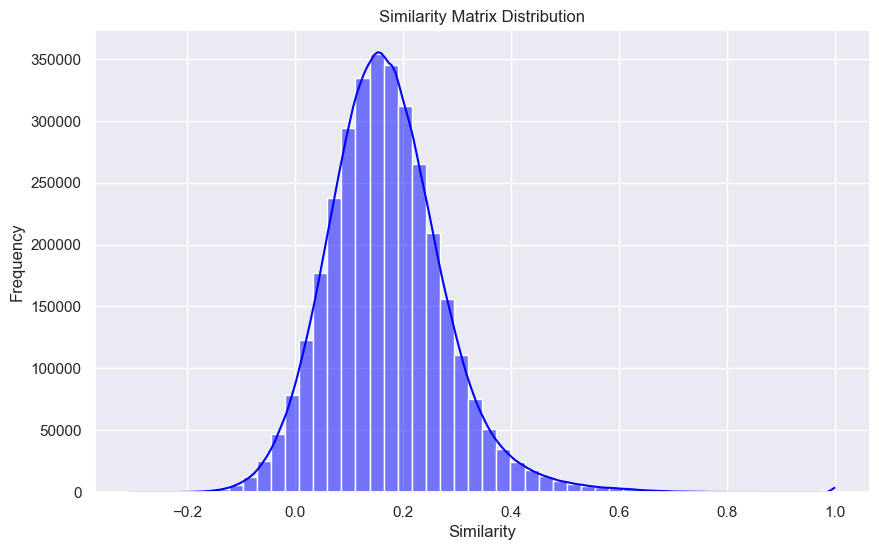

In [189]:
#Compute the similarity matrix
vectorsSelections = vectorsNormalized
dictionatySelections = dictionaty
similarityMatrix = vectorsSelections @ vectorsSelections.T
print(similarityMatrix.shape)

#plot the similarity matrix distribution using sns
plt.figure(figsize=(10, 6))
plt.title('Similarity Matrix Distribution')
sns.histplot(similarityMatrix.flatten(), bins=50, kde=True, color='blue')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()

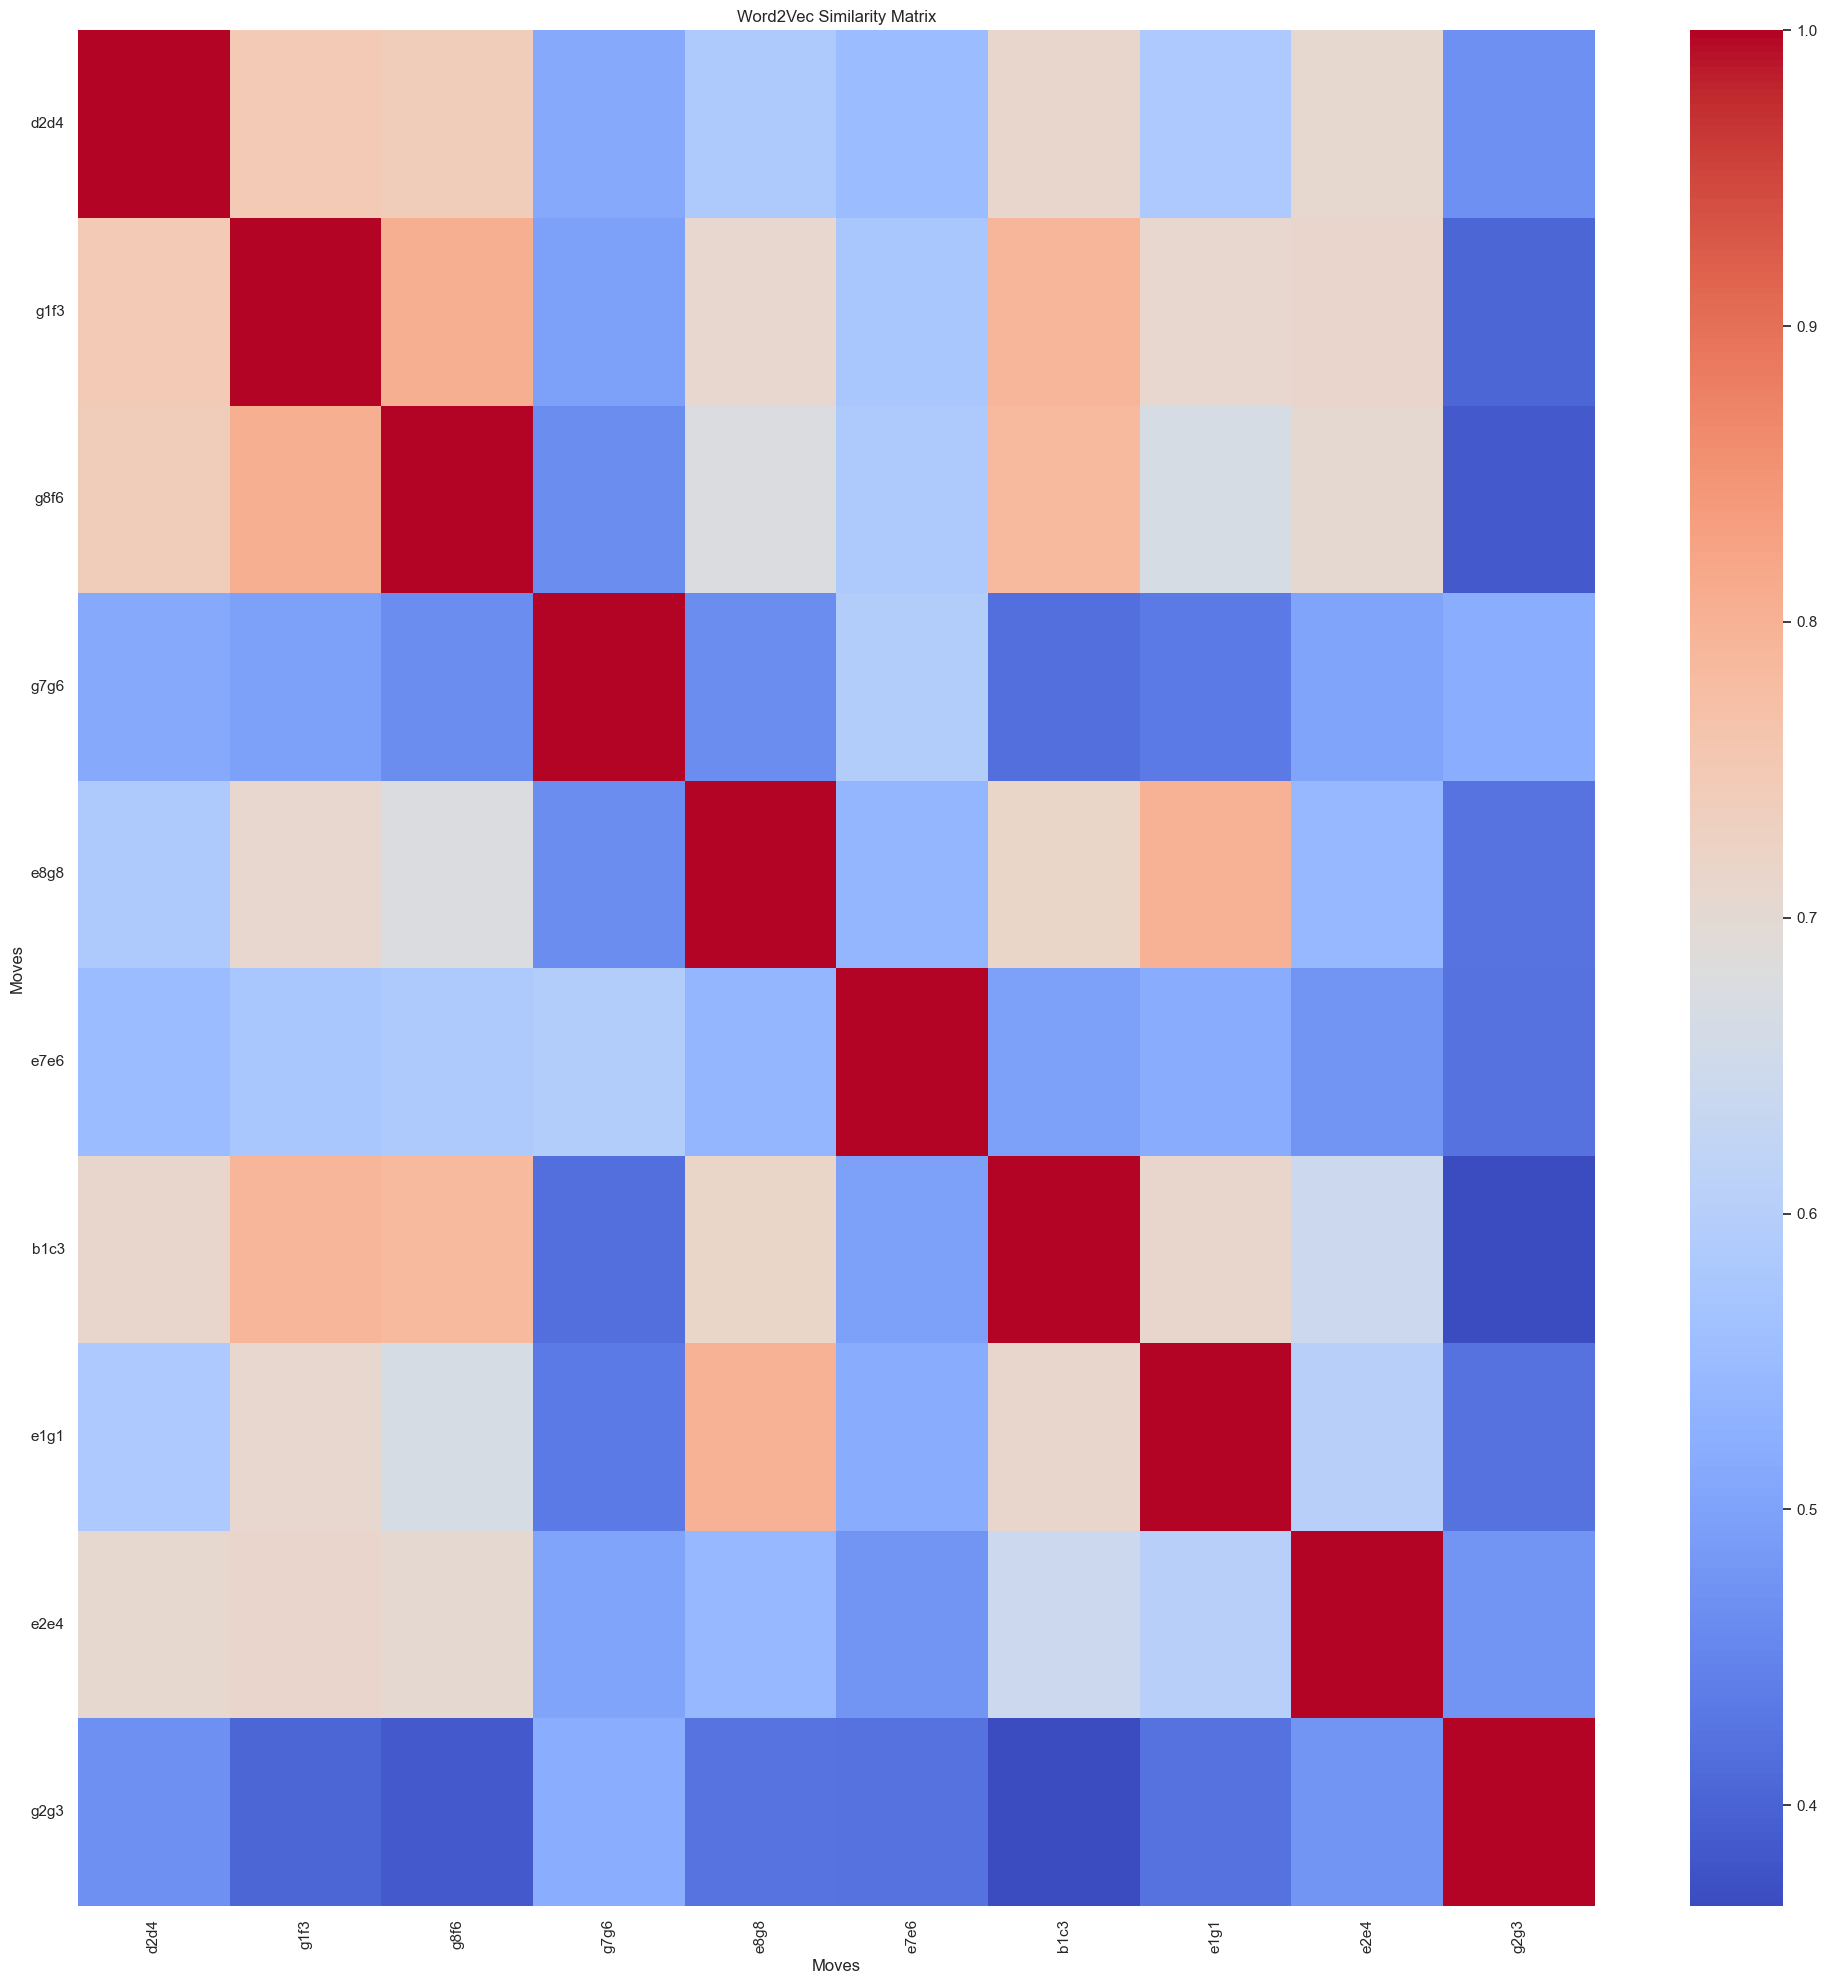

In [190]:
# Plot the similarity matrix using seaborn
nVectors = 10
plt.figure(figsize=(20, 20))
sns.heatmap(similarityMatrix[:nVectors, :nVectors], xticklabels=dictionatySelections[:nVectors],
            yticklabels=dictionatySelections[:nVectors], cmap='coolwarm')
plt.title('Word2Vec Similarity Matrix')
plt.xlabel('Moves')
plt.ylabel('Moves')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

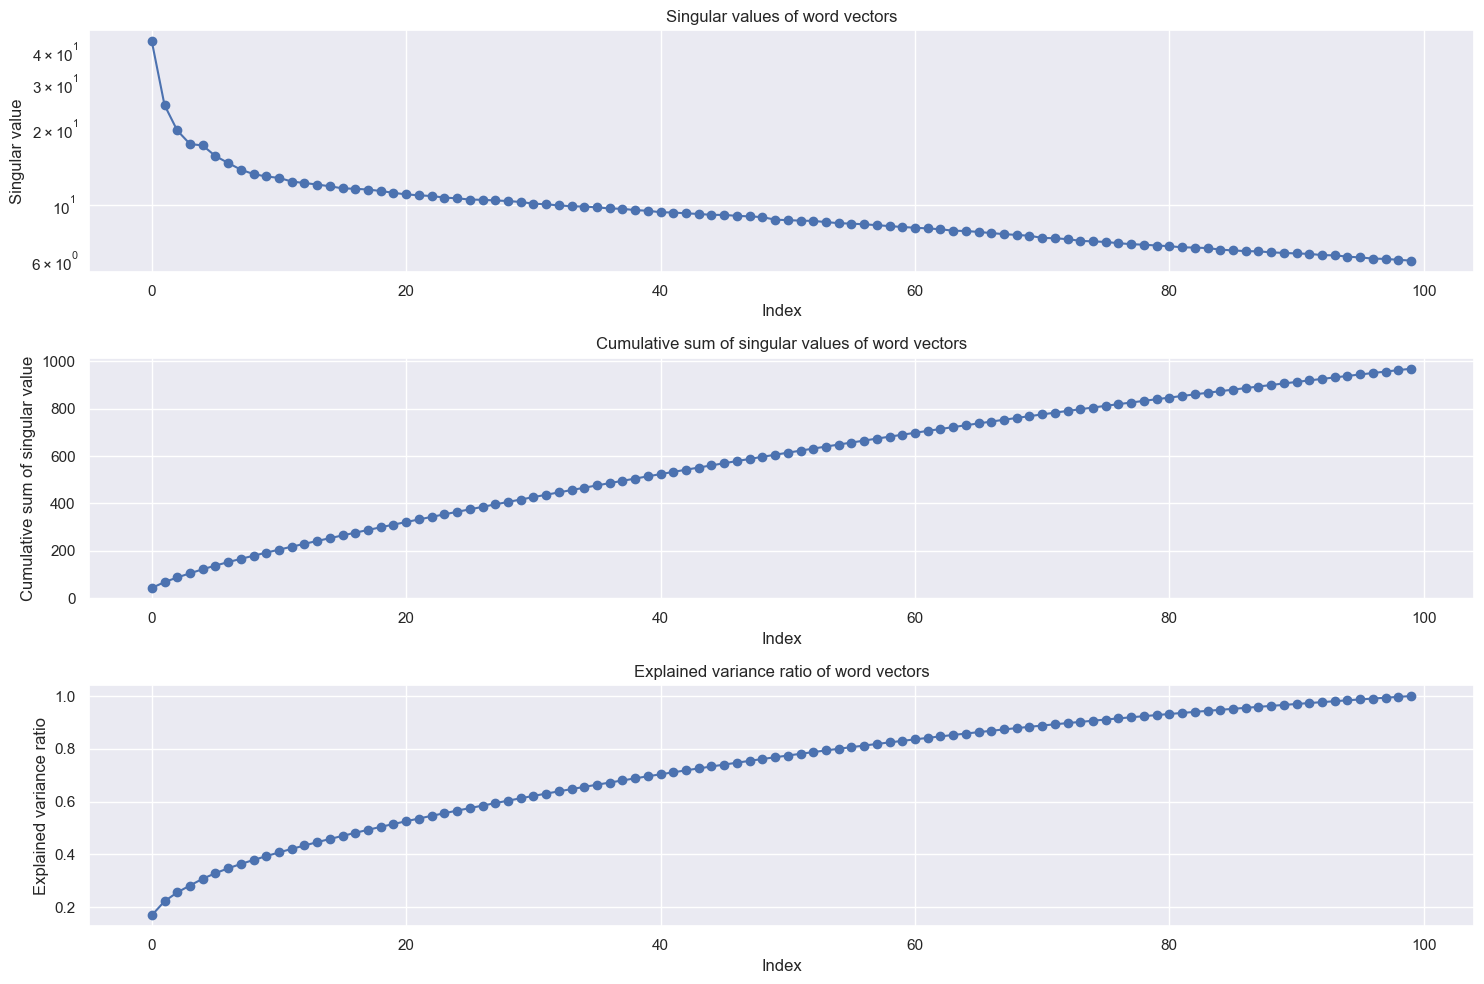

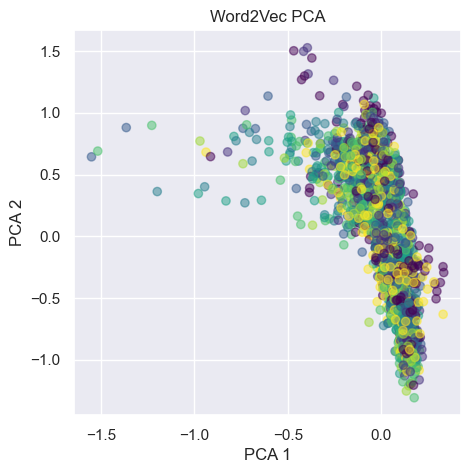

In [191]:
#PCA over the word vectors
wordVectorsCentered = wordVectors - np.mean(wordVectors, axis=0)
U, s, Vt = np.linalg.svd(wordVectors, full_matrices=False)
# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot the singular values
axes[0].semilogy(s, 'o-')
axes[0].set_title('Singular values of word vectors')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Singular value')

# Plot the cumulative sum of the singular values
axes[1].plot(np.cumsum(s), 'o-')
axes[1].set_title('Cumulative sum of singular values of word vectors')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Cumulative sum of singular value')

# Plot the explained variance ratio
axes[2].plot(np.cumsum(s**2) / np.sum(s**2), 'o-')
axes[2].set_title('Explained variance ratio of word vectors')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Explained variance ratio')

# Adjust layout
plt.tight_layout()

plt.show()


wordVectorsPCA = np.dot(wordVectorsCentered, Vt.T)
#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsPCA[:, 0], wordVectorsPCA[:, 1], alpha=0.5, c = startingLetter, cmap='viridis')
plt.title('Word2Vec PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


c:\Polimi\Master\2Sem\NLP-Project\.conda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


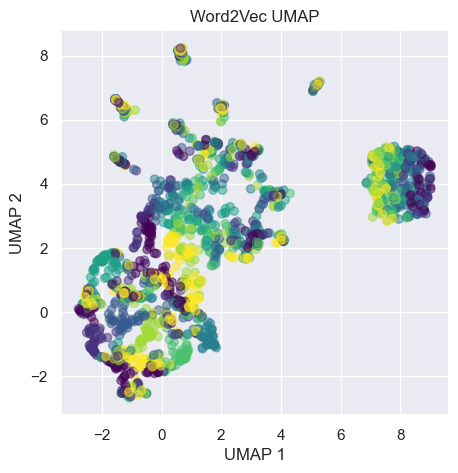

In [192]:
#umap projection
import umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
embedding = reducer.fit_transform(wordVectors)
plt.figure(figsize=(5, 5))
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5, c = startingLetter, cmap='viridis')
plt.title('Word2Vec UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


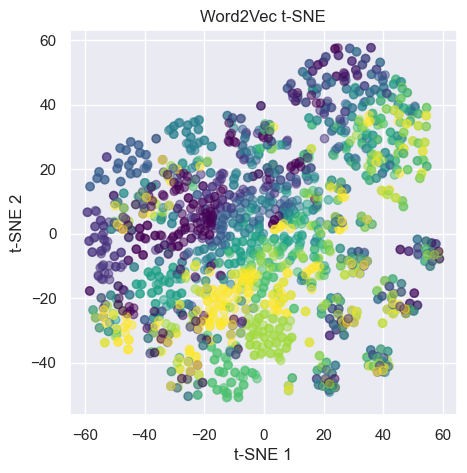

In [193]:
# tsne over the word vectors
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30)

wordVectorsTSNE = tsne.fit_transform(wordVectors)
#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], alpha=0.5, c= startingLetter, cmap='viridis')
plt.title('Word2Vec t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

Number of clusters: 20


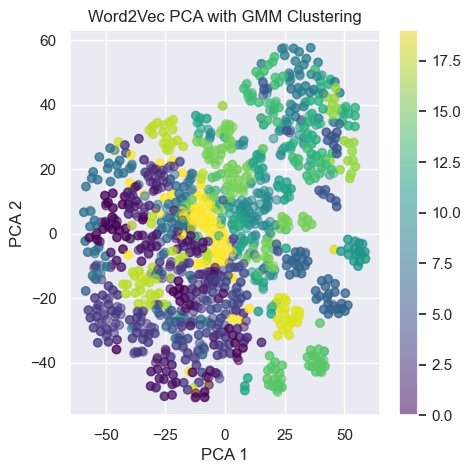

In [194]:
#Perform gaussian mixture model clustering
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=20, random_state=0)
gmm.fit(wordVectors)
clusters = gmm.predict(wordVectors)
#Print the number of clusters
print(f'Number of clusters: {len(np.unique(clusters))}')
#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.title('Word2Vec PCA with GMM Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

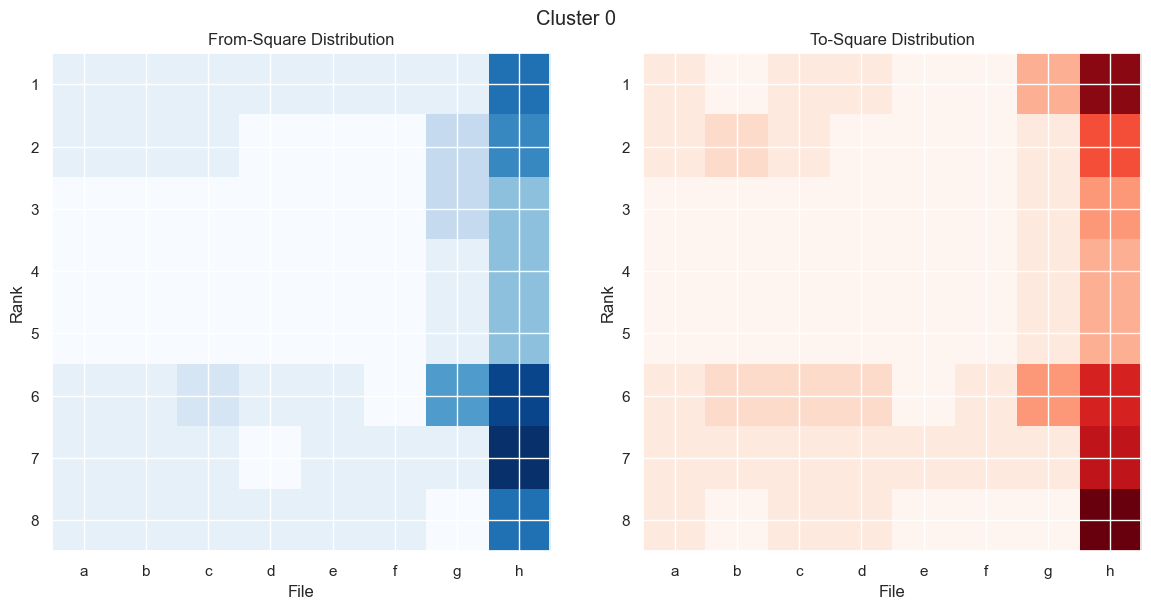

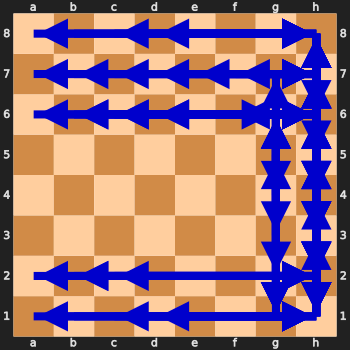

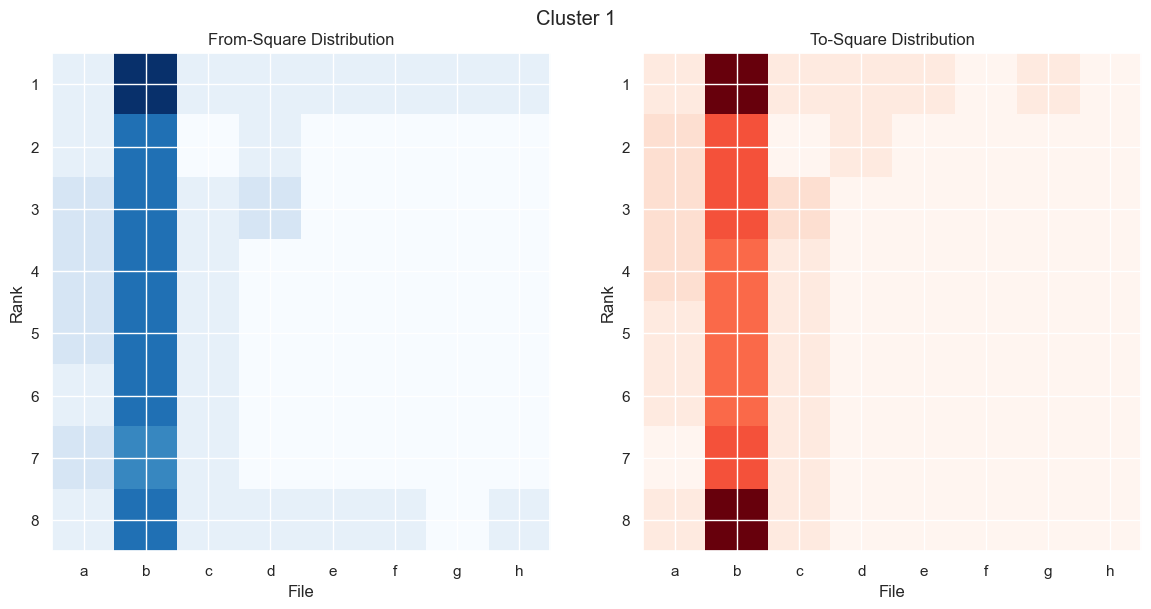

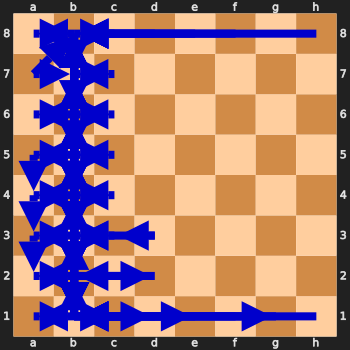

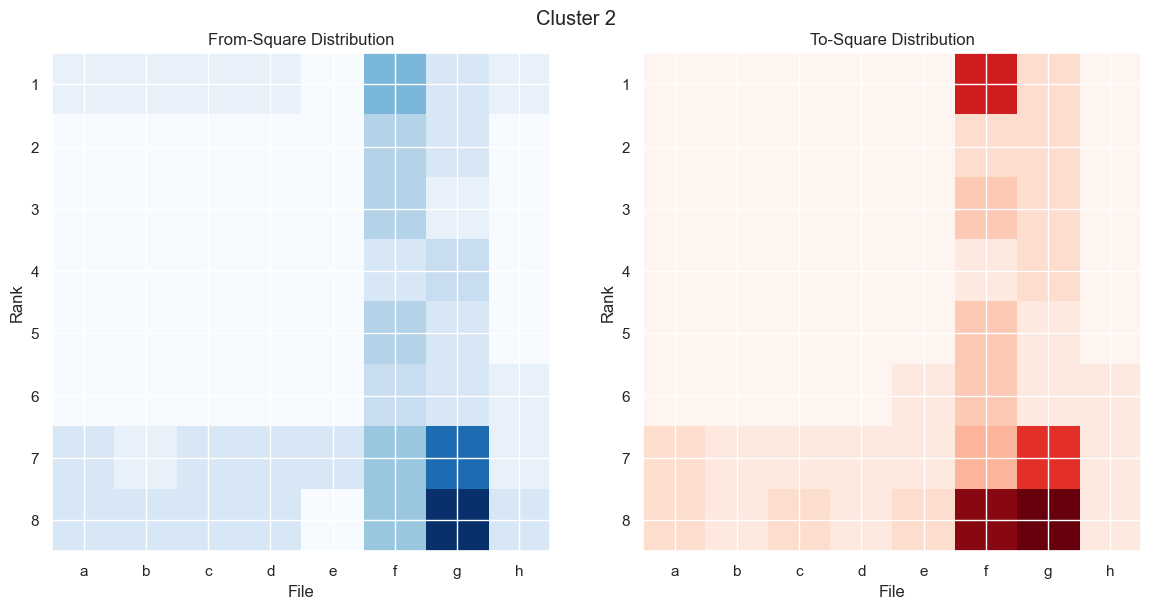

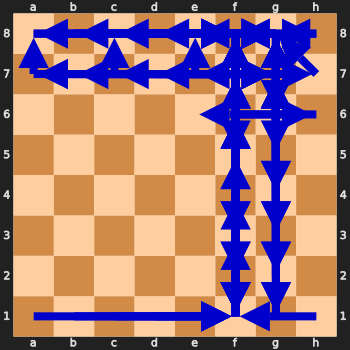

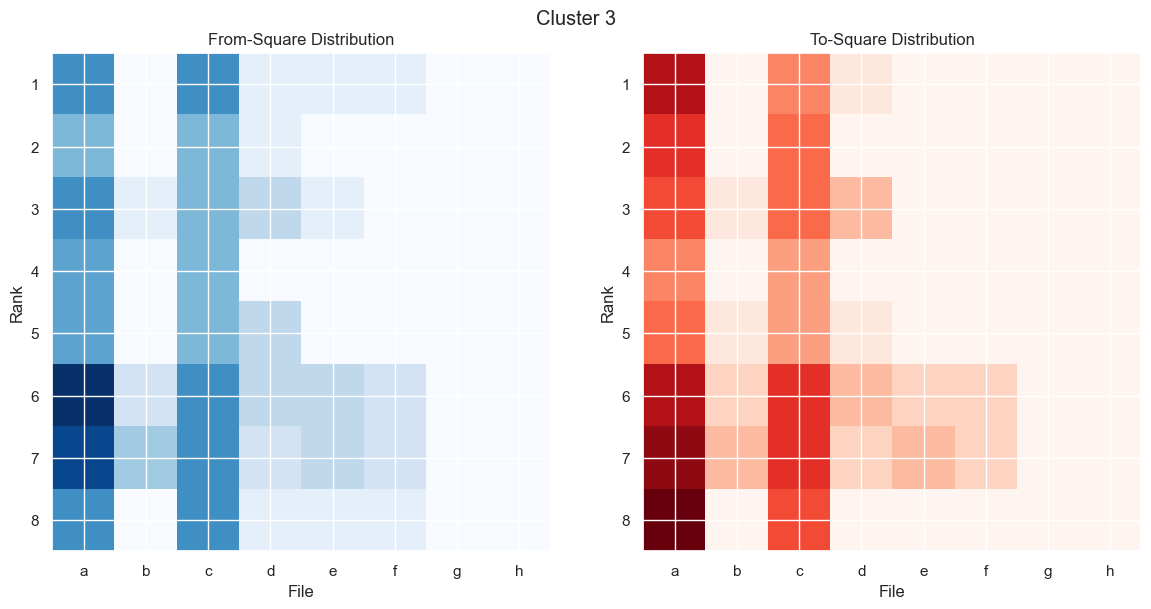

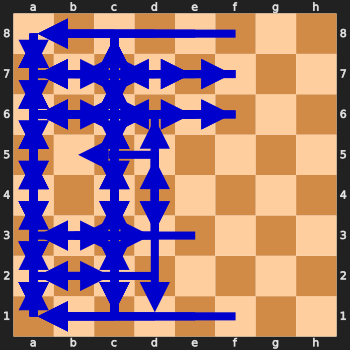

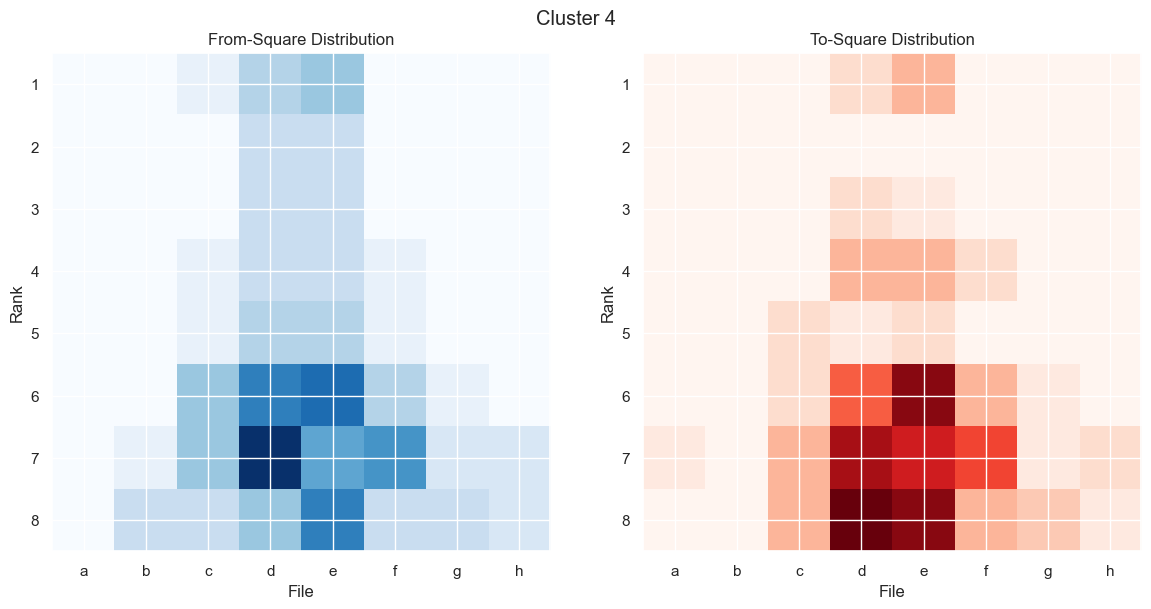

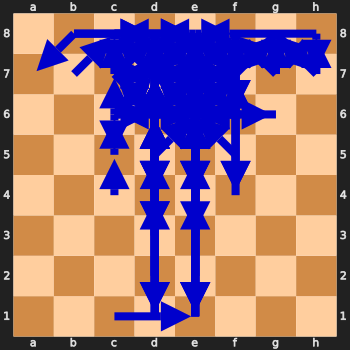

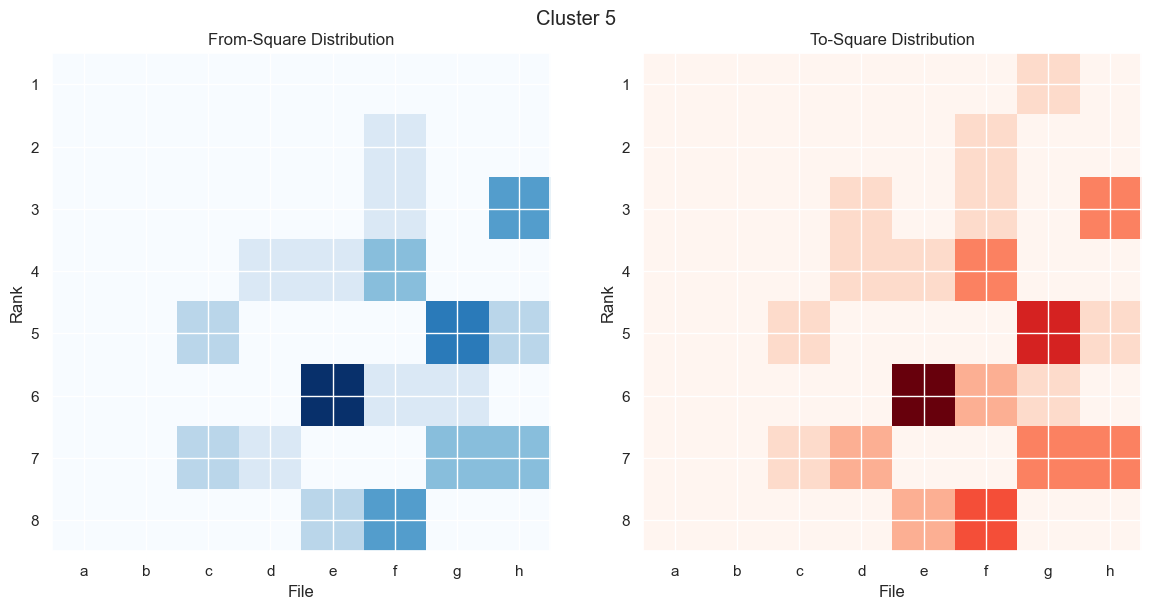

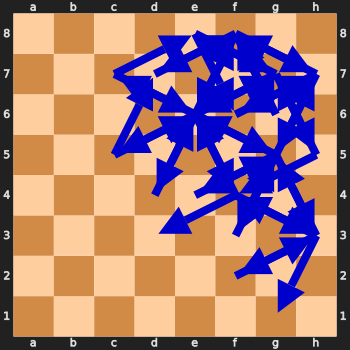

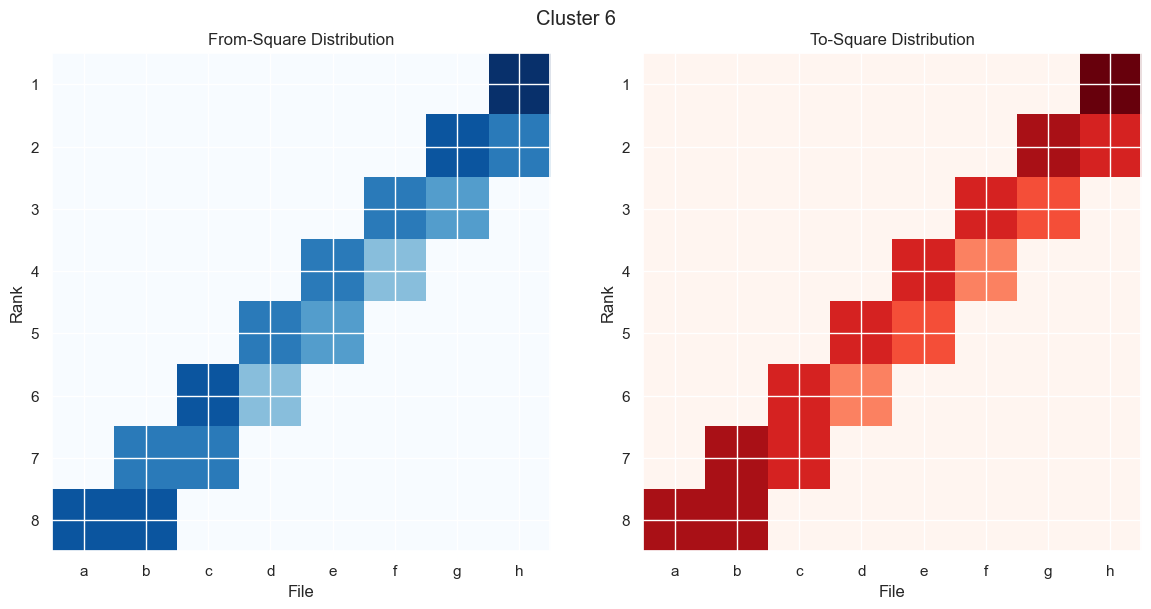

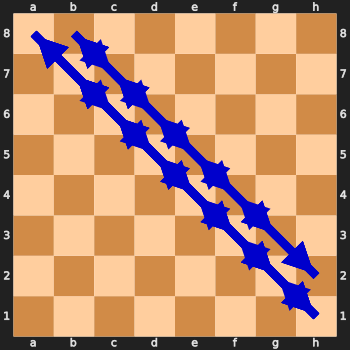

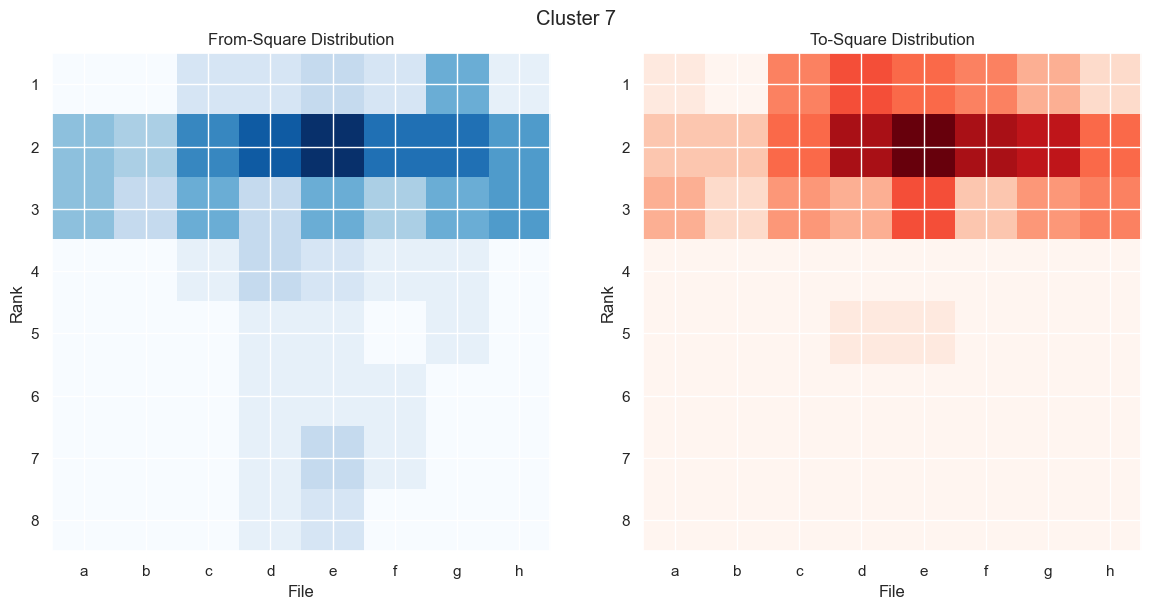

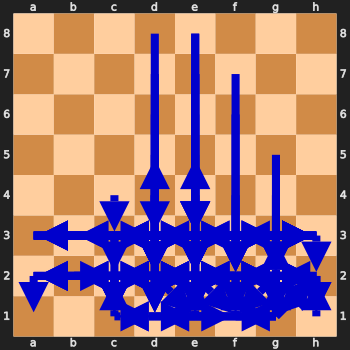

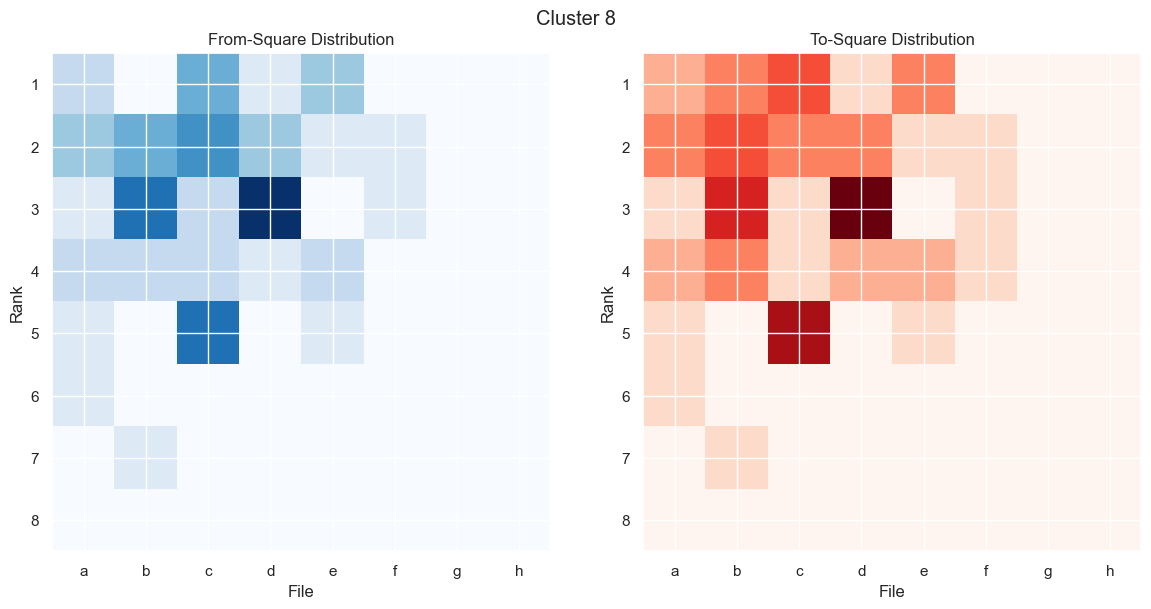

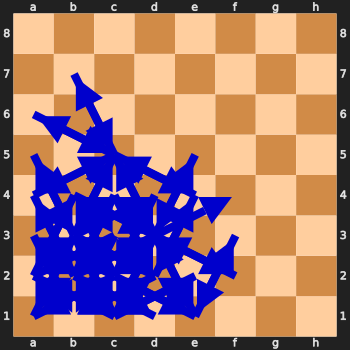

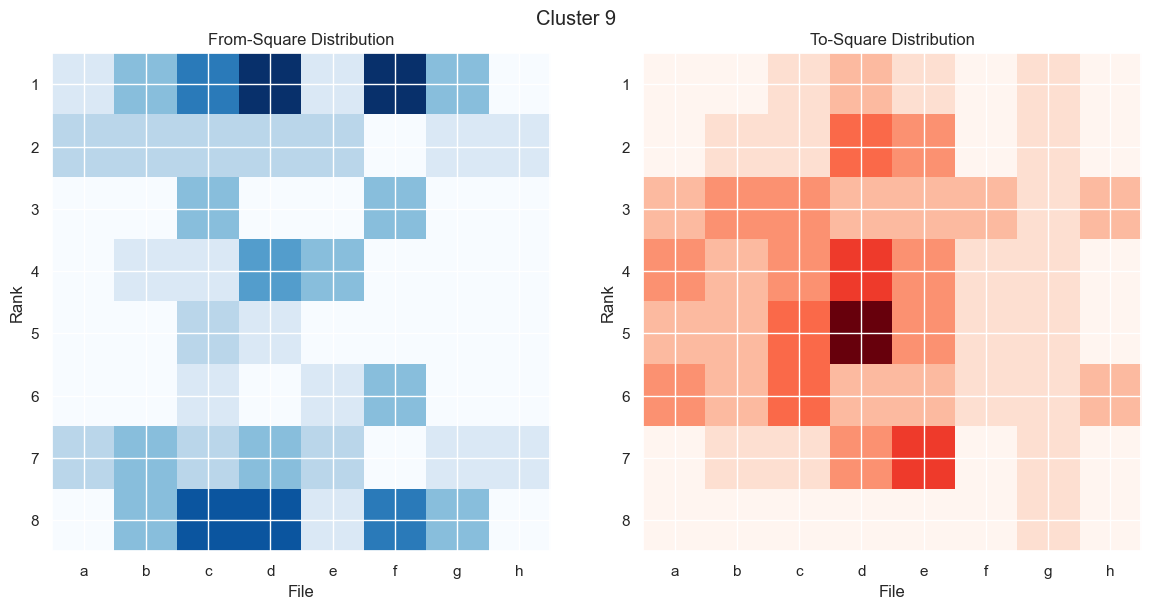

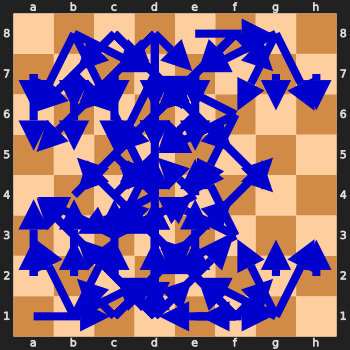

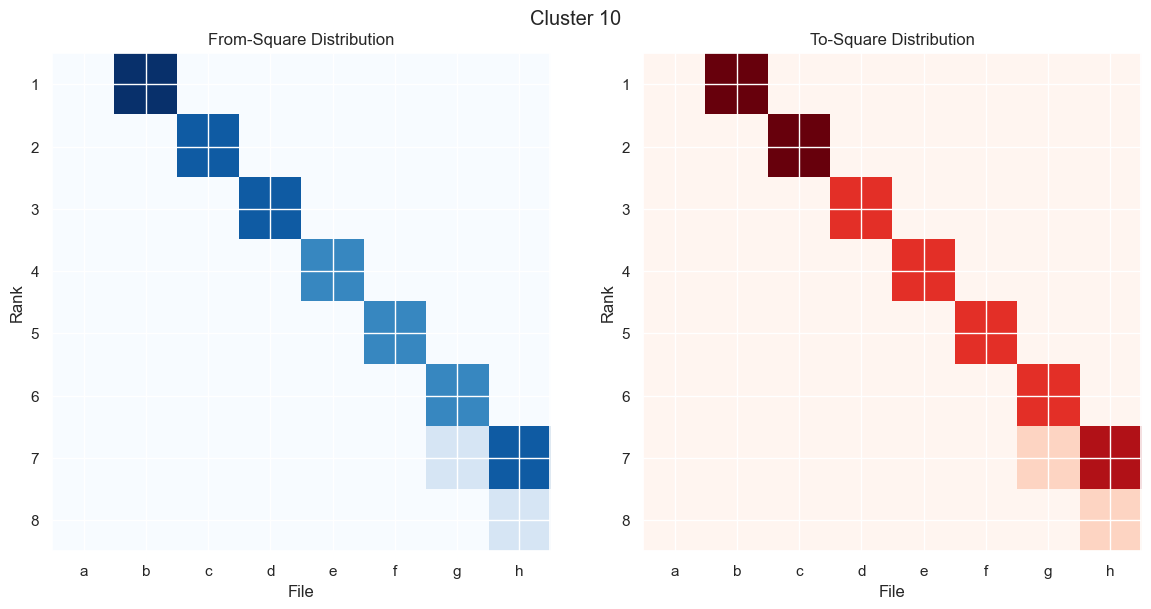

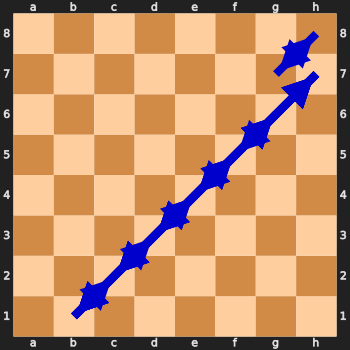

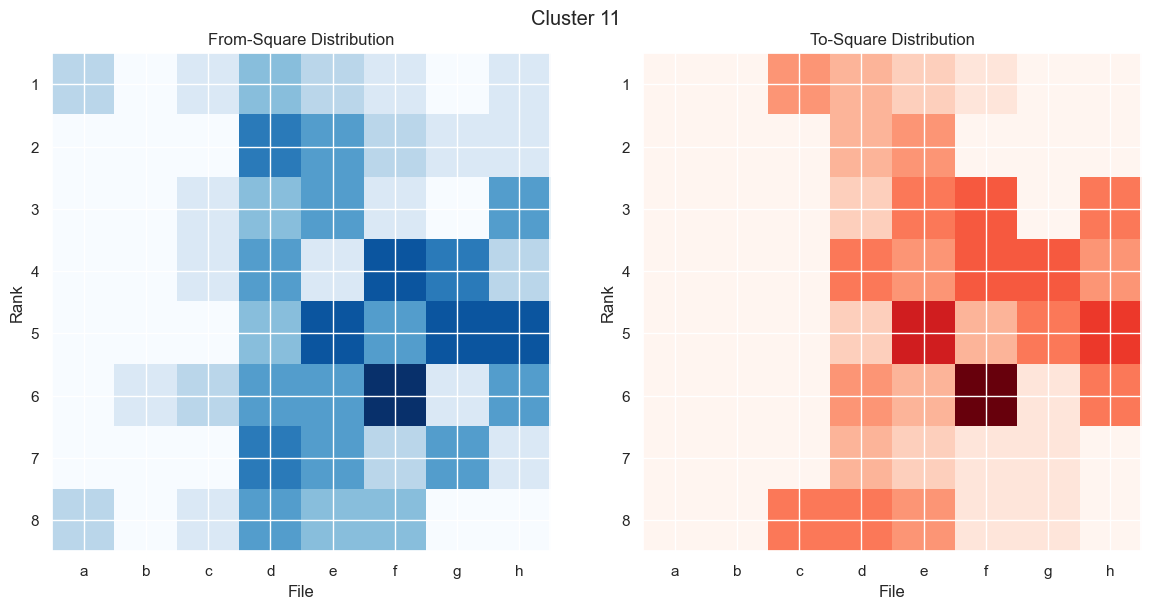

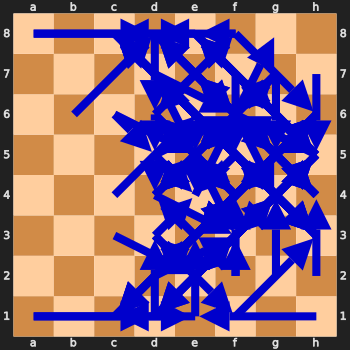

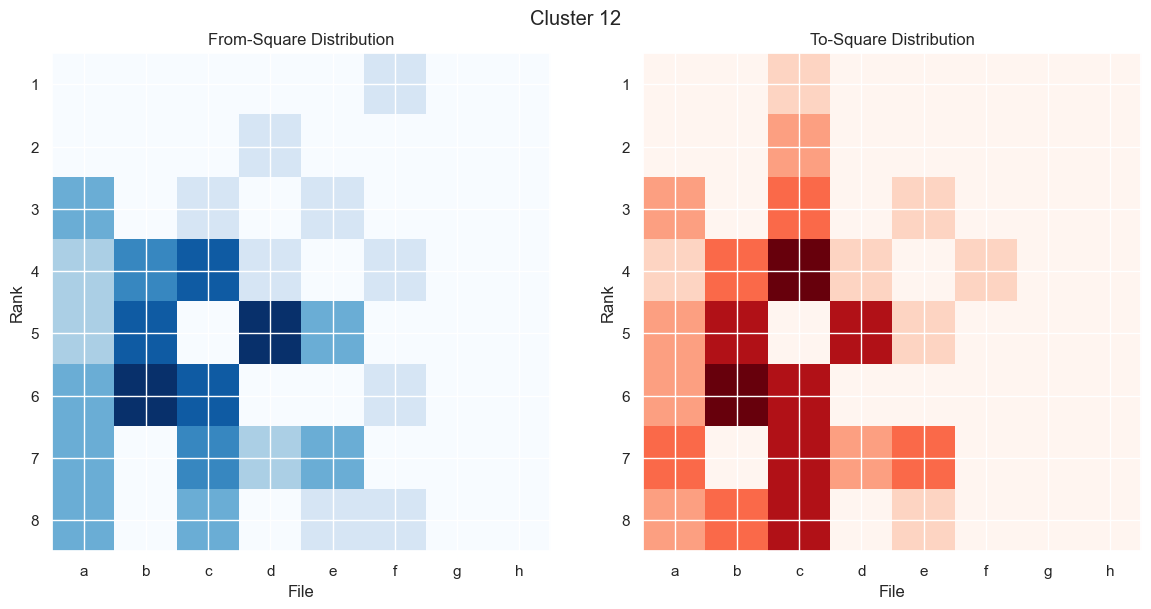

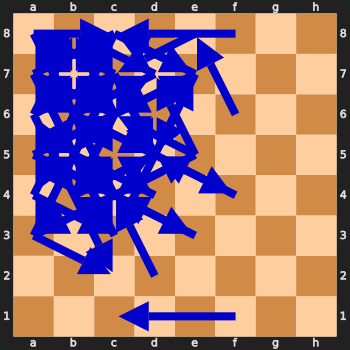

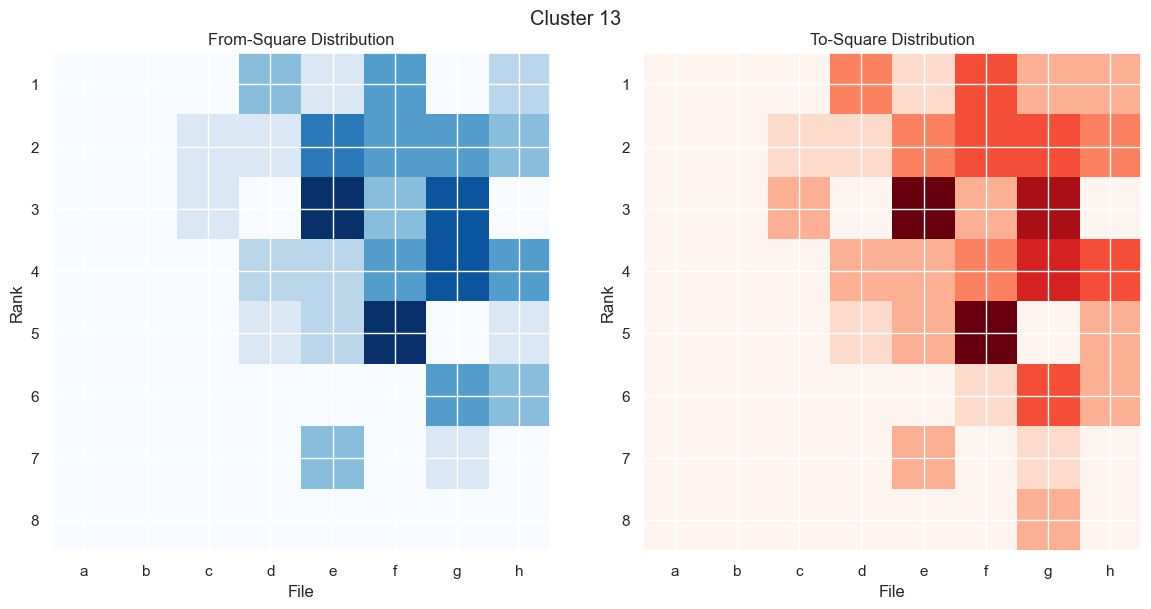

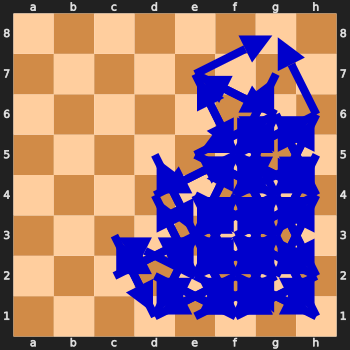

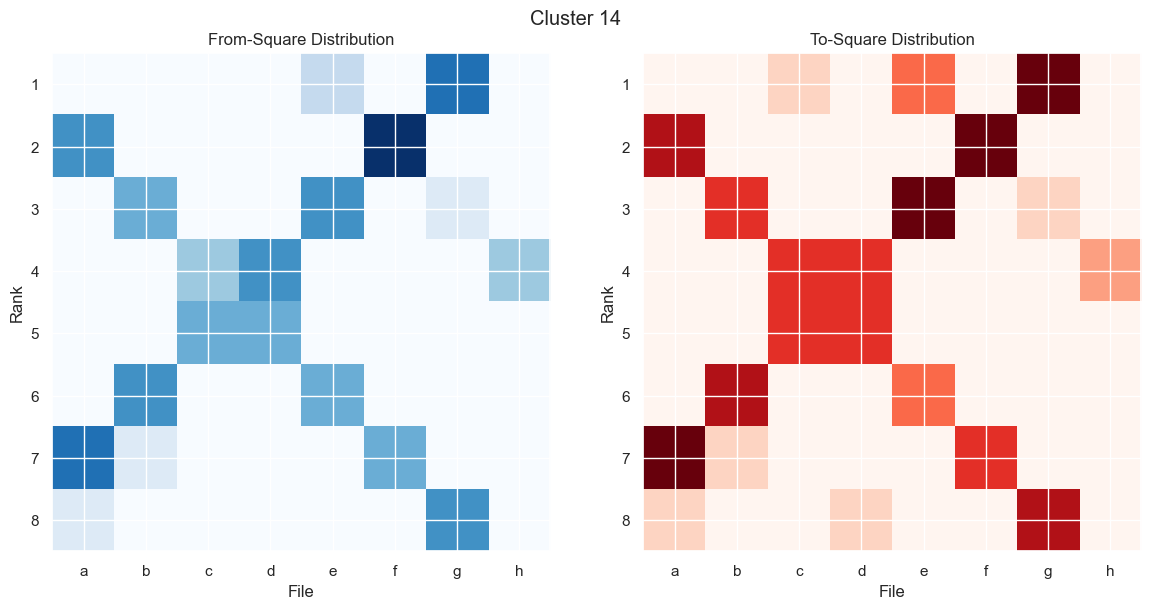

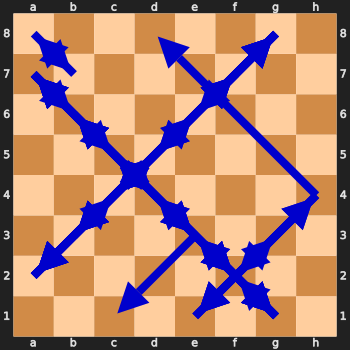

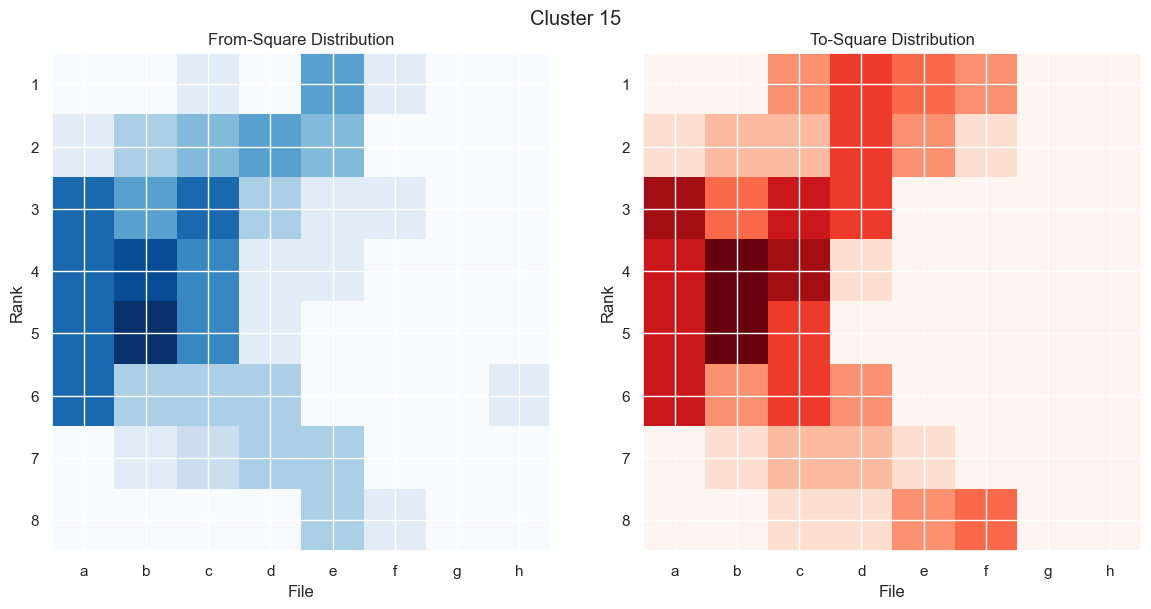

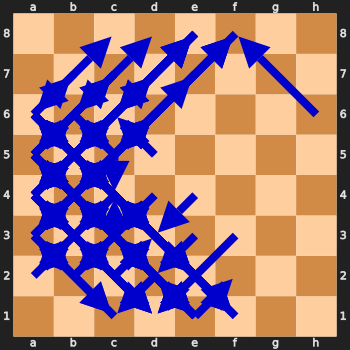

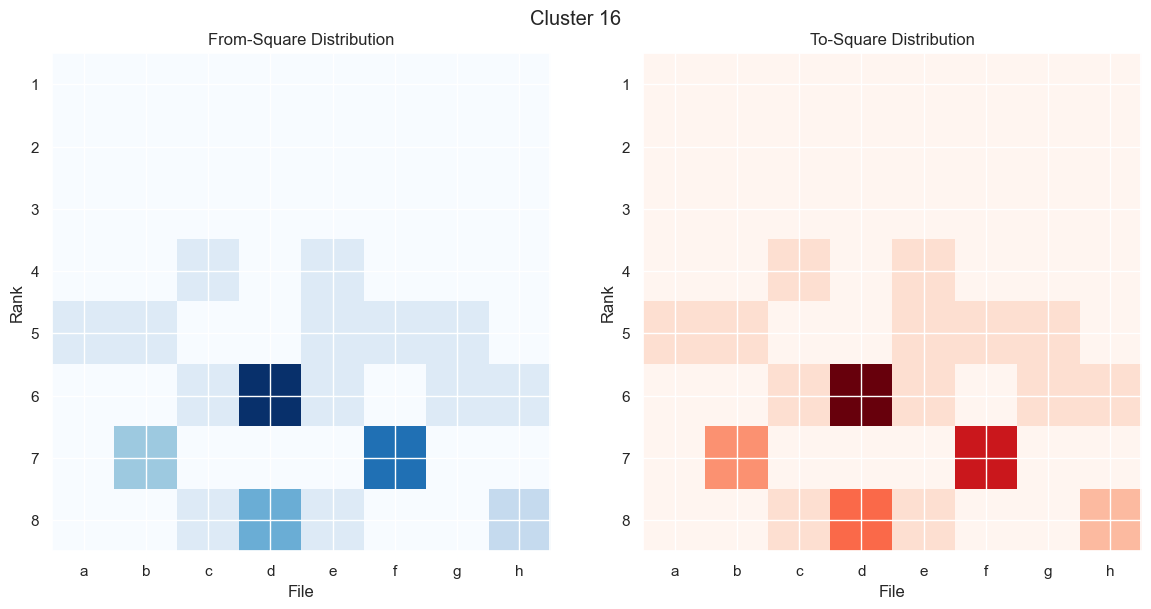

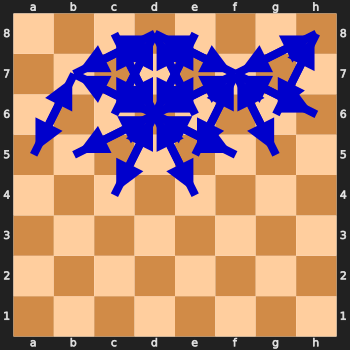

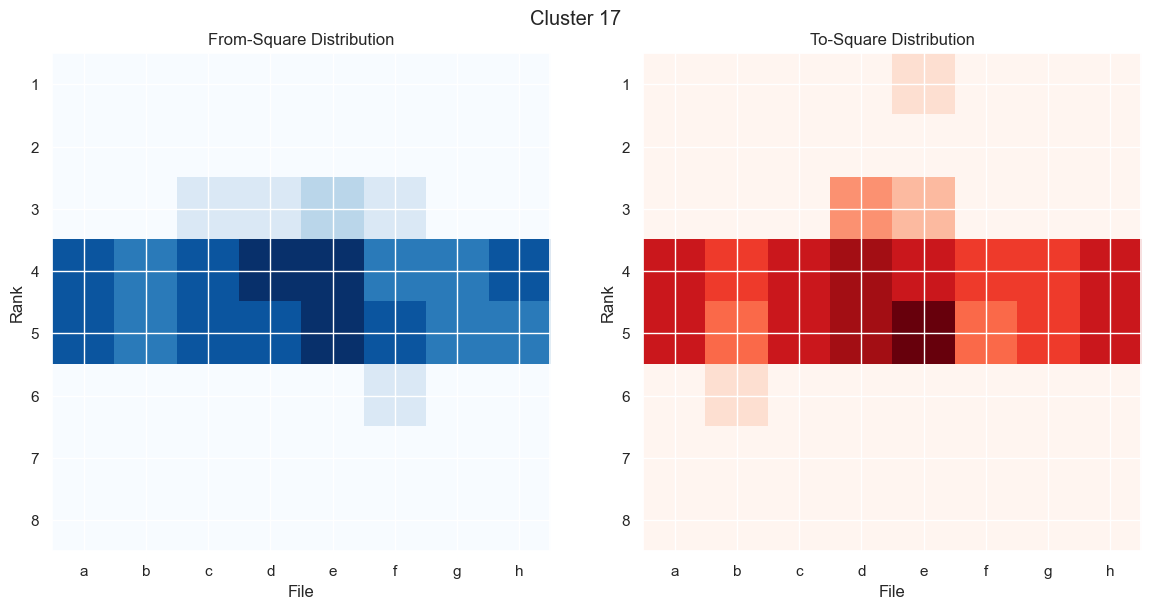

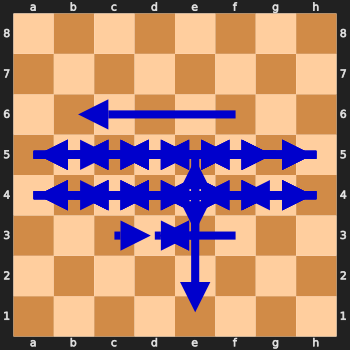

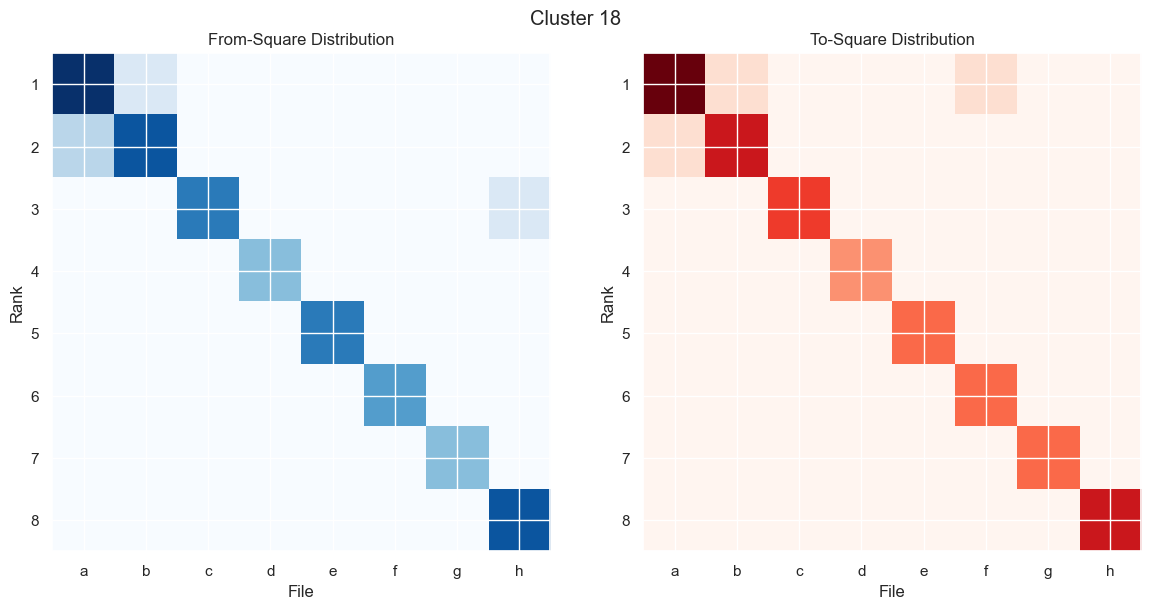

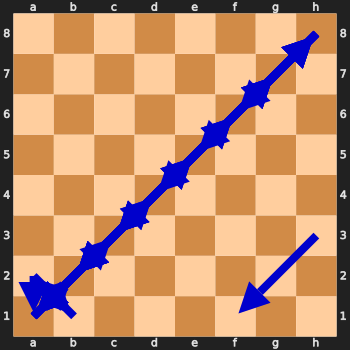

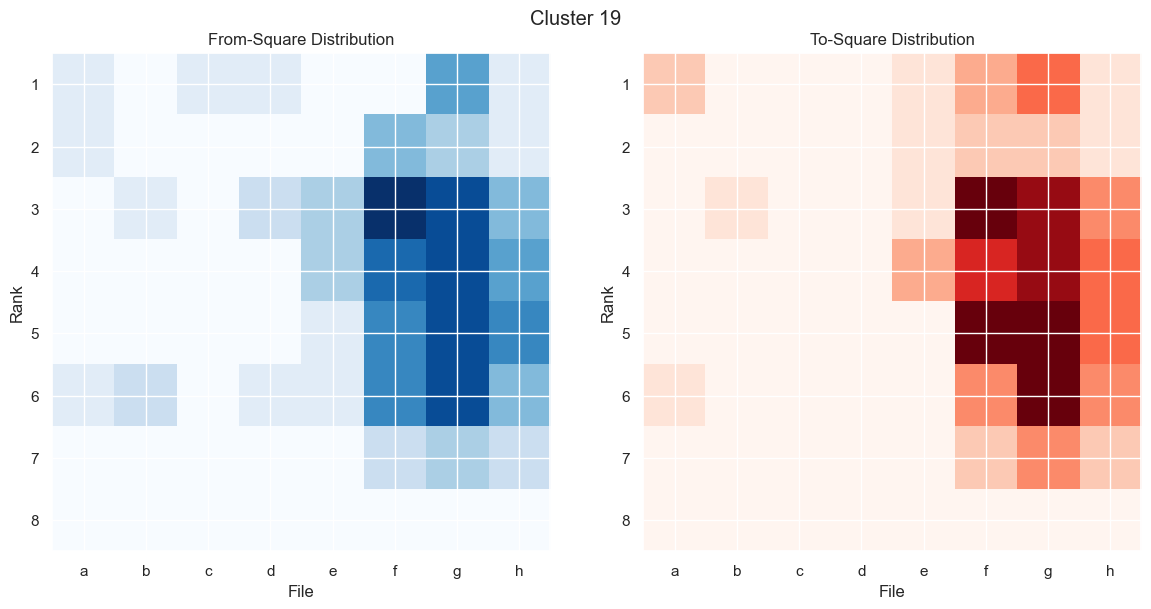

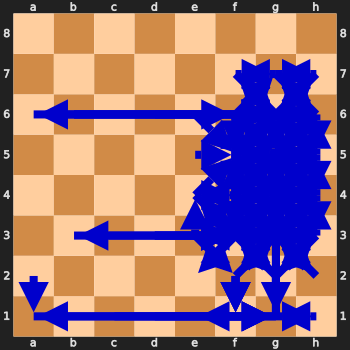

In [195]:
maxCluster = np.max(clusters)
for i in range(maxCluster + 1):
    clusterMoves = dictionaty[clusters == i]
    movePlotter = MovePlotter(title=f'Cluster {i}')
    for move in clusterMoves:
        movePlotter.addMove(move)
    movePlotter.plot()

Number of clusters found: 27


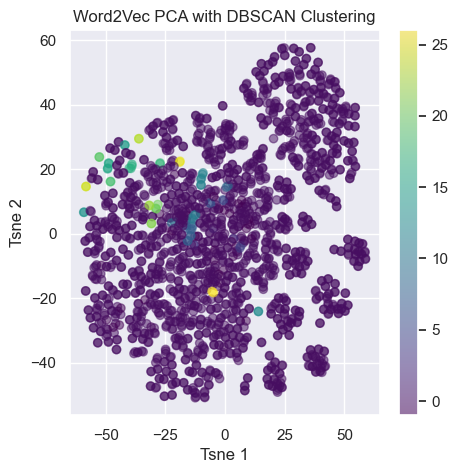

In [196]:
#DBscan clustering using cosine distance
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.43,min_samples=2, metric='cosine')

dbscan.fit(wordVectors)
clusters = dbscan.labels_

#Print the number of clusters found
print(f'Number of clusters found: {len(set(clusters)) - (1 if -1 in clusters else 0)}')

#Print number of 

#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.title('Word2Vec PCA with DBSCAN Clustering')
plt.xlabel('Tsne 1')
plt.ylabel('Tsne 2')
plt.colorbar()
plt.show()


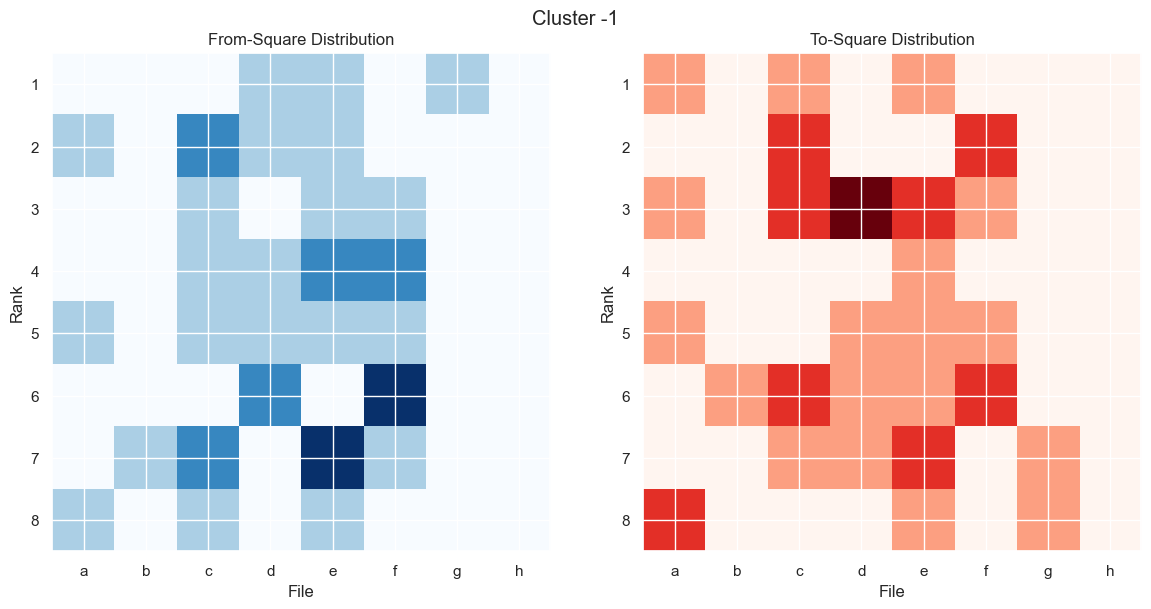

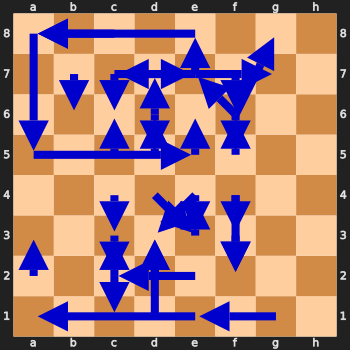

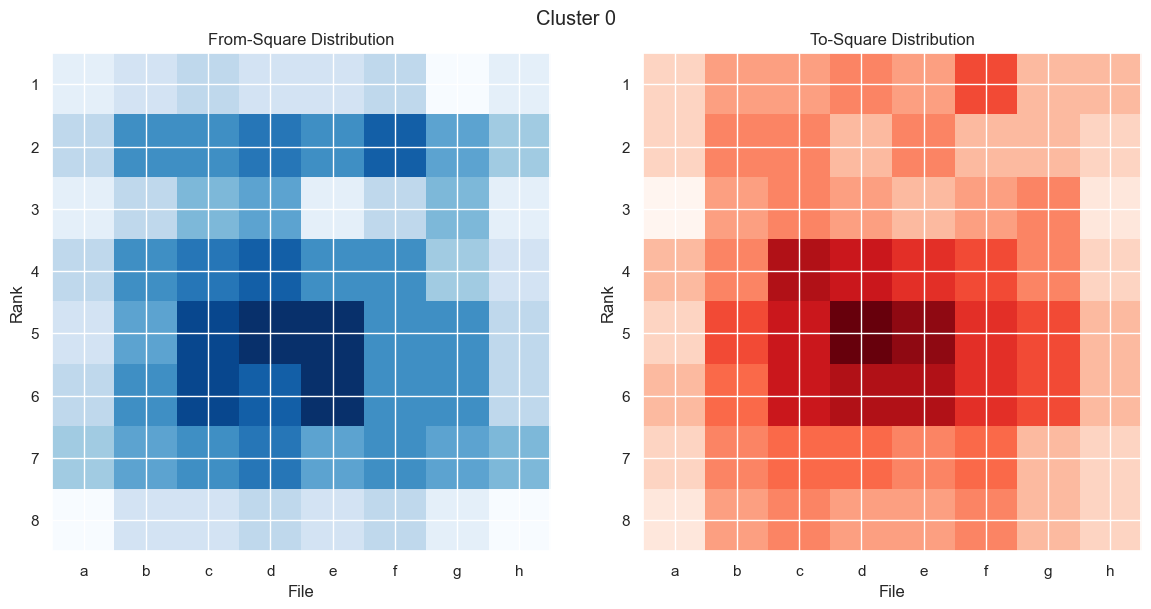

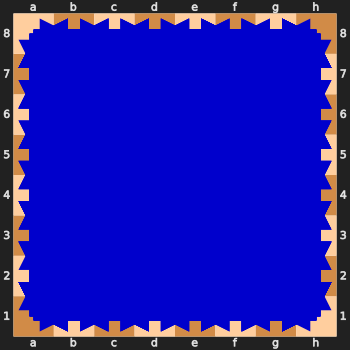

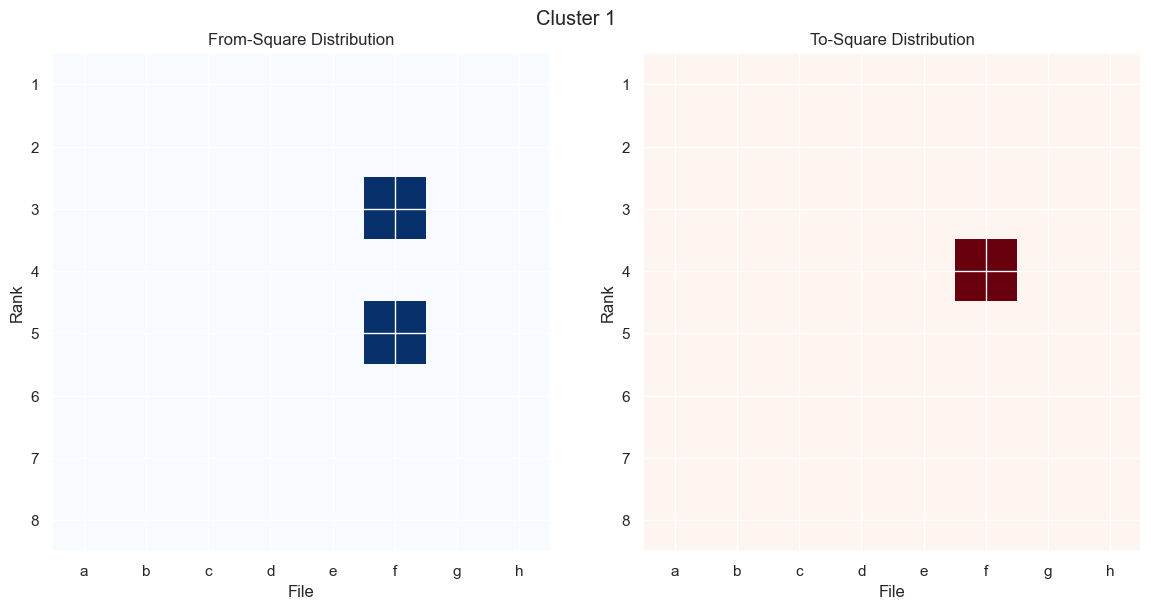

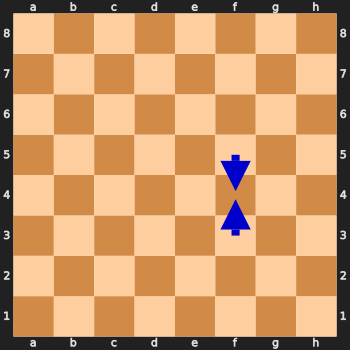

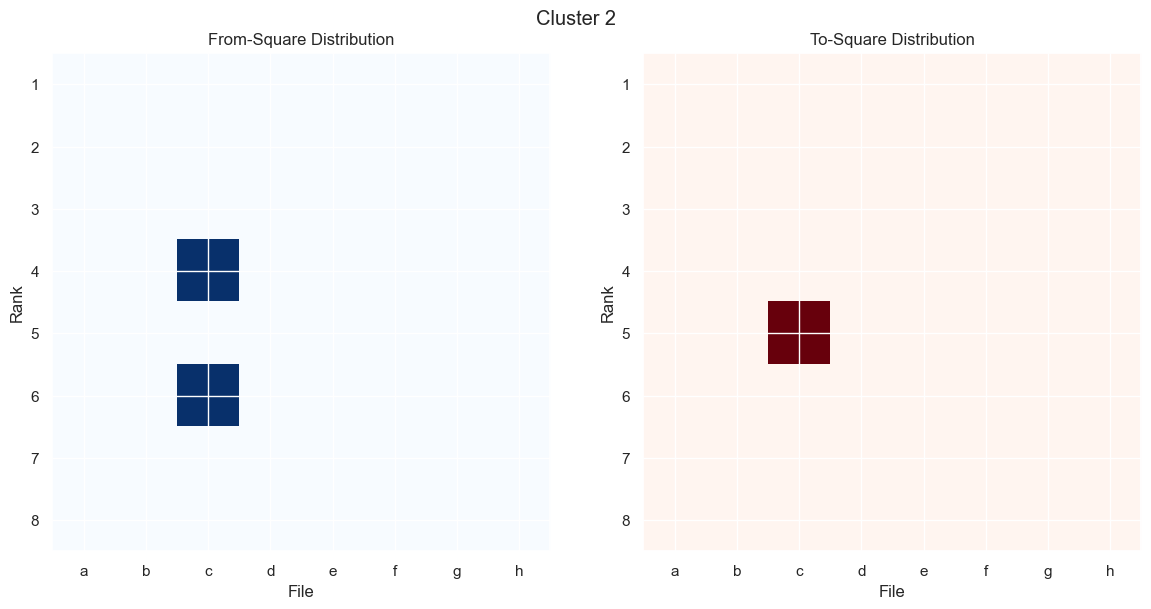

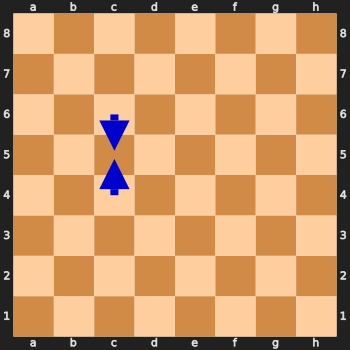

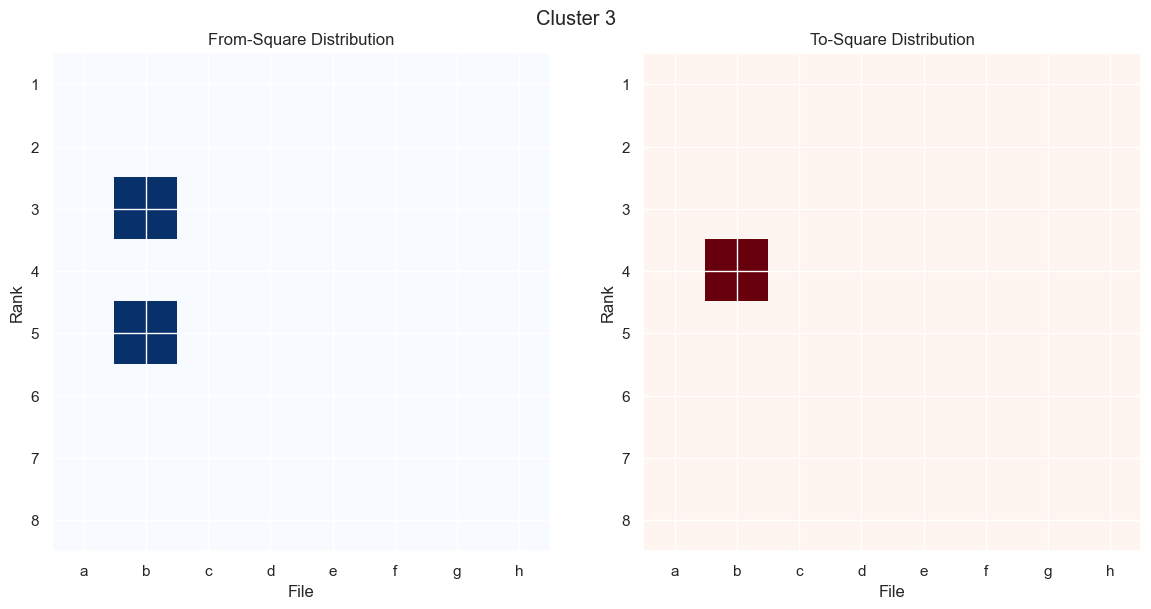

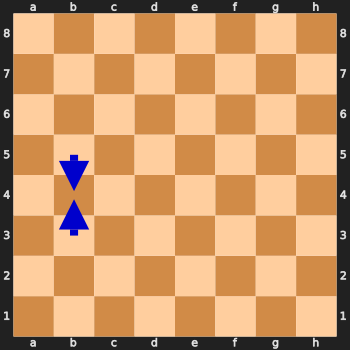

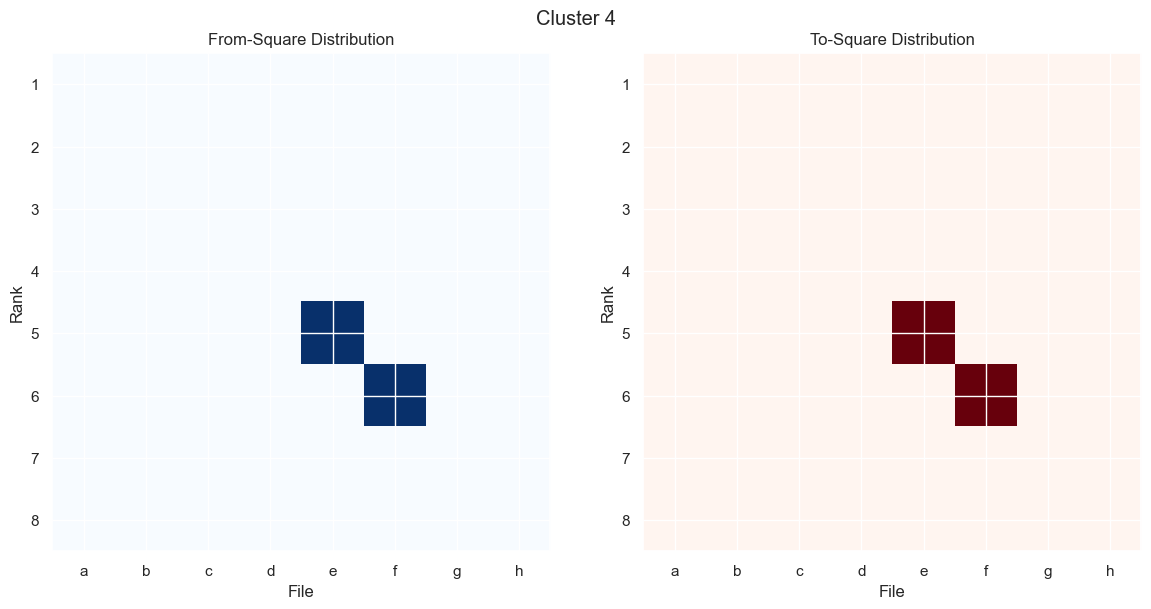

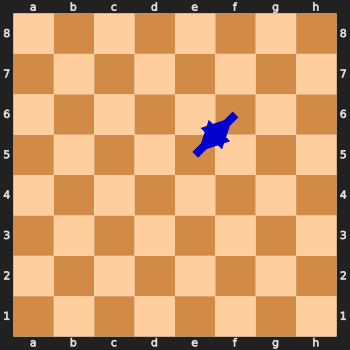

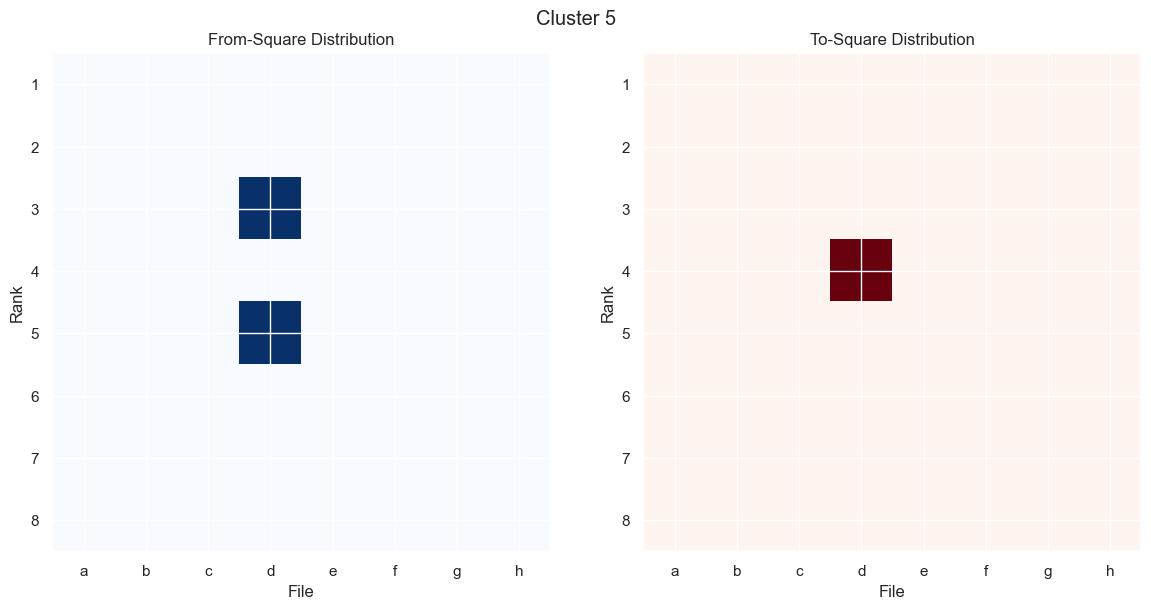

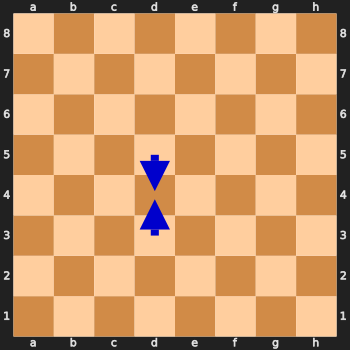

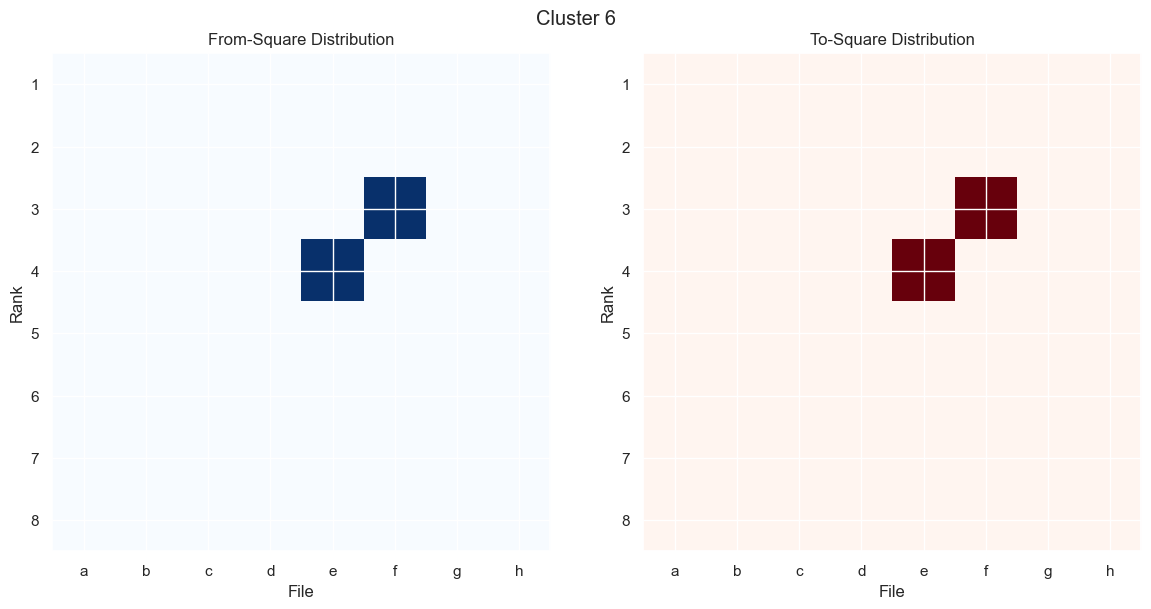

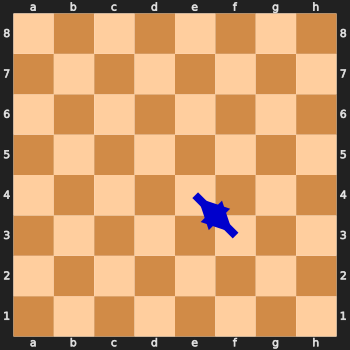

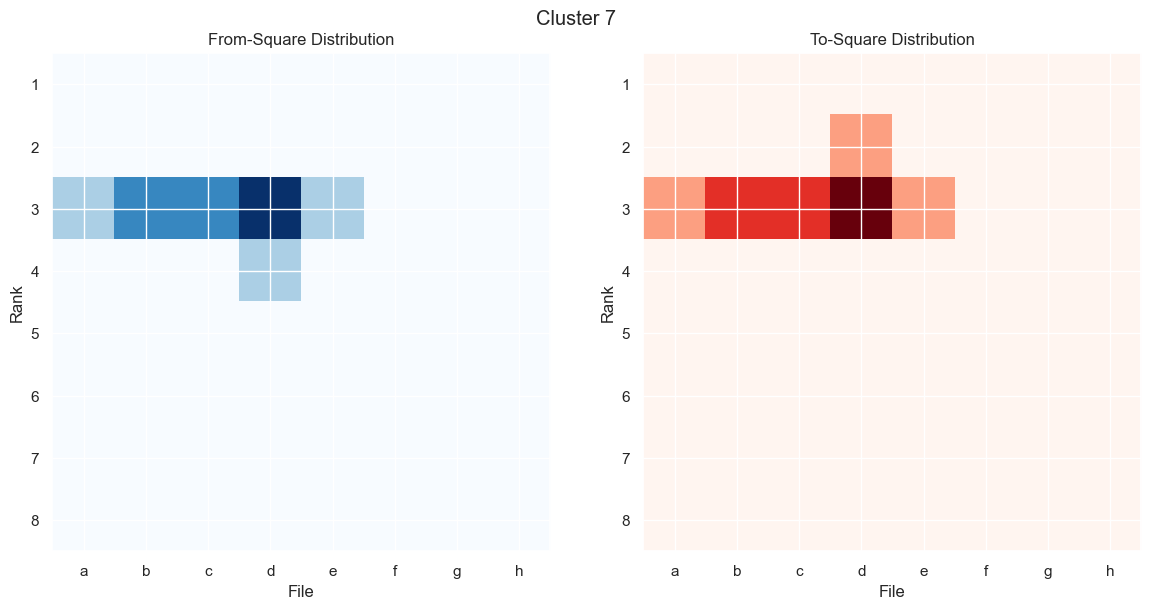

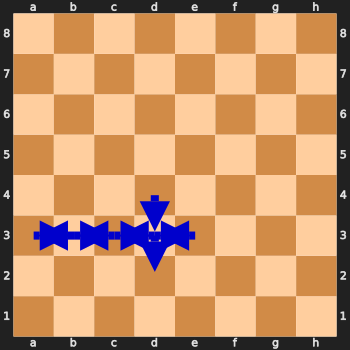

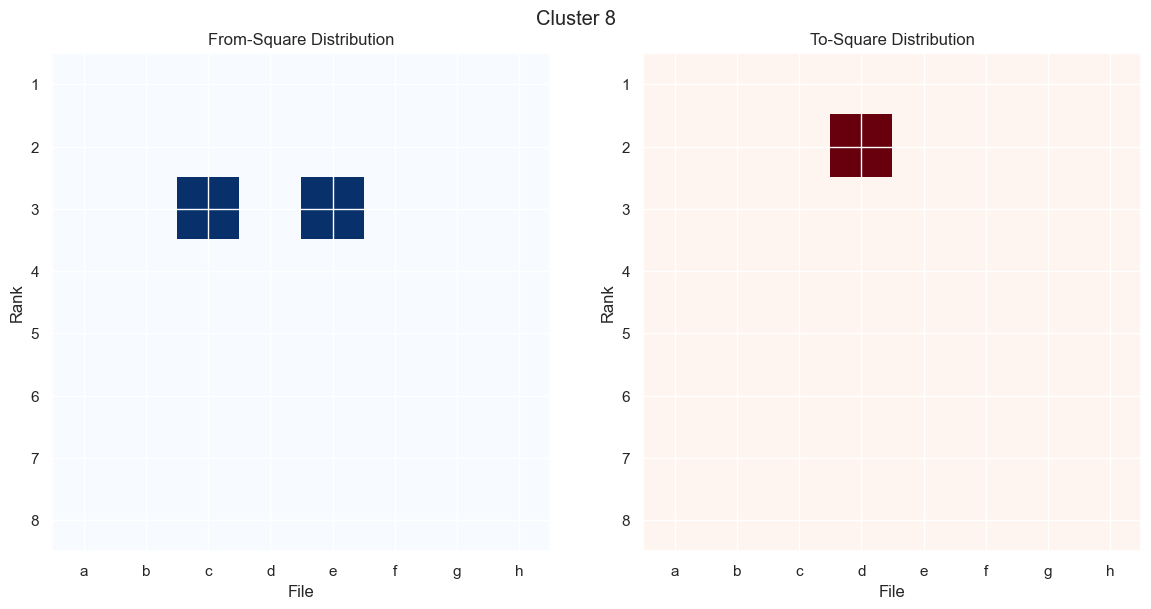

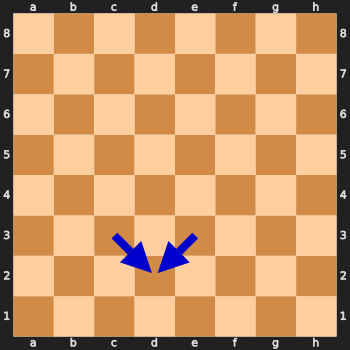

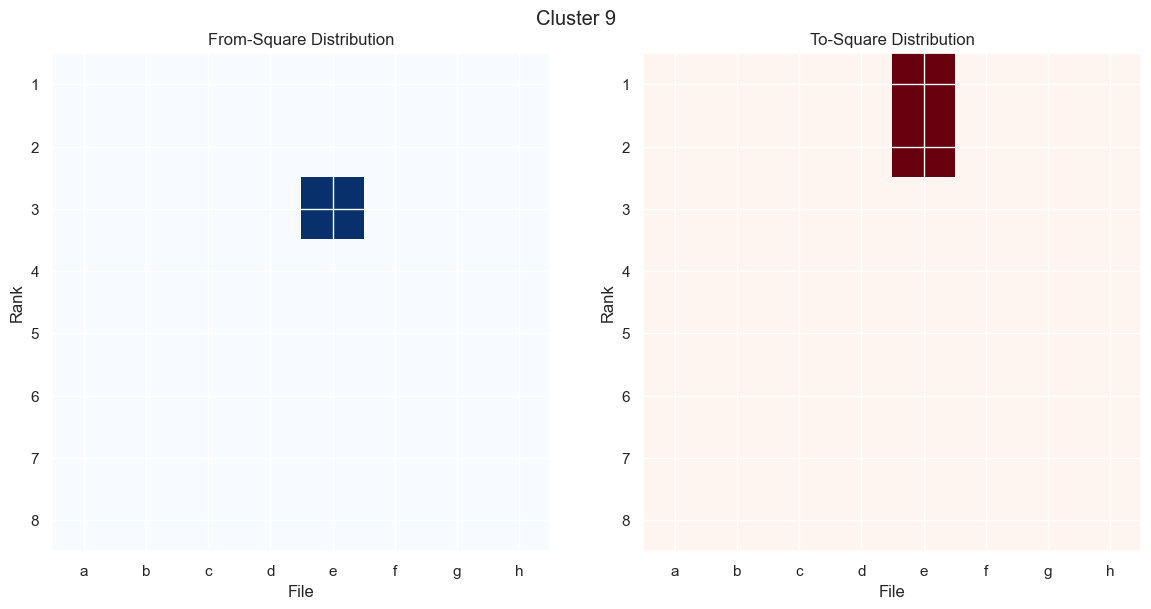

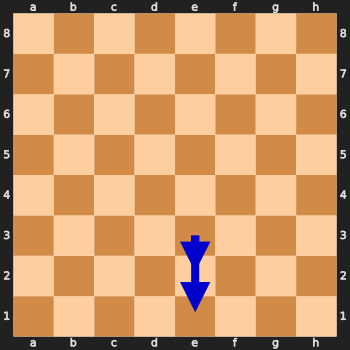

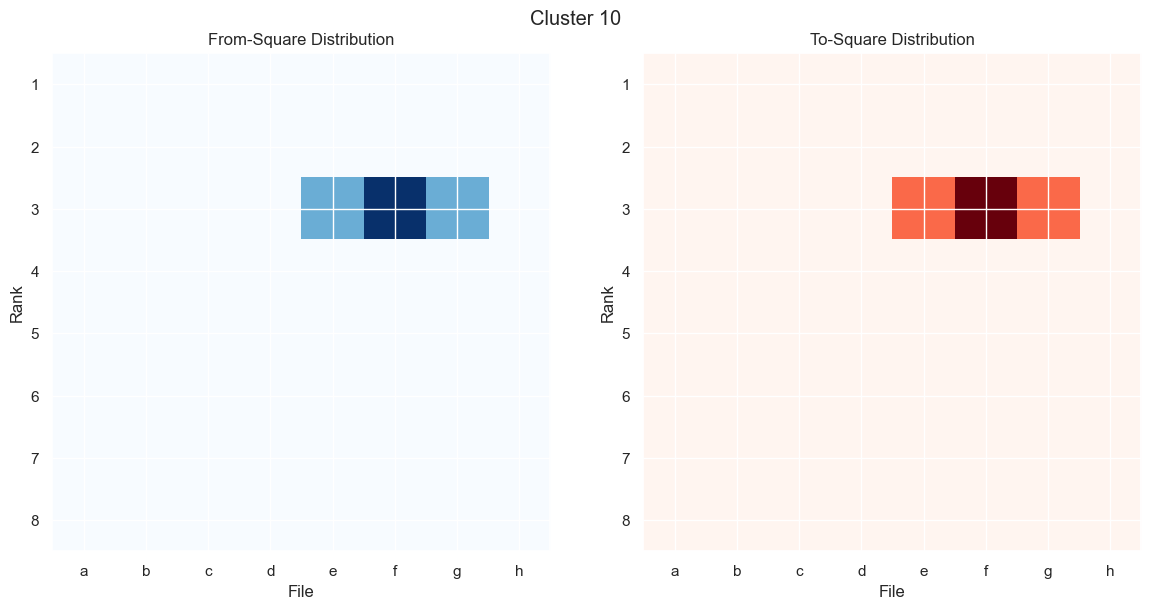

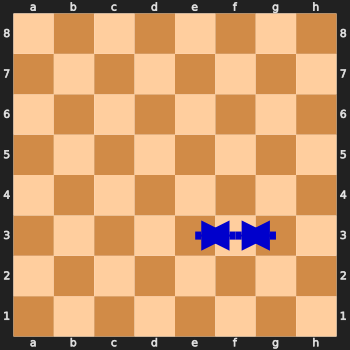

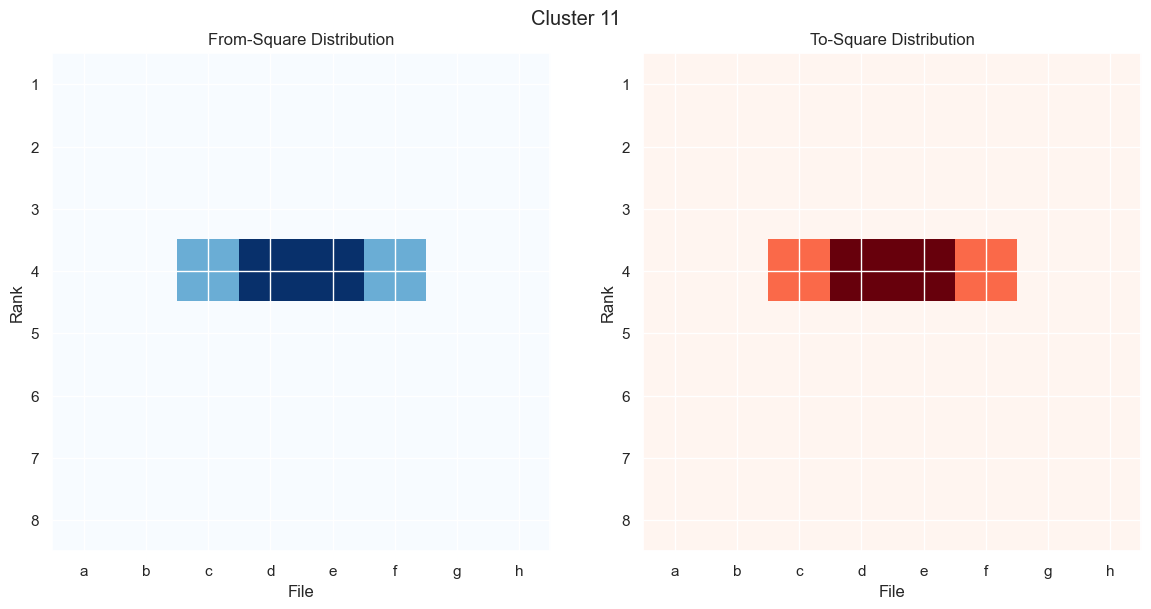

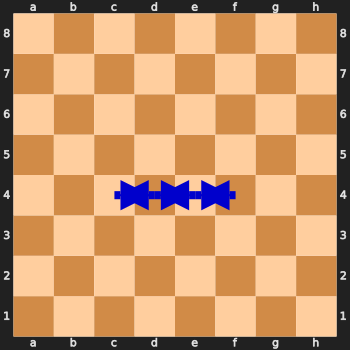

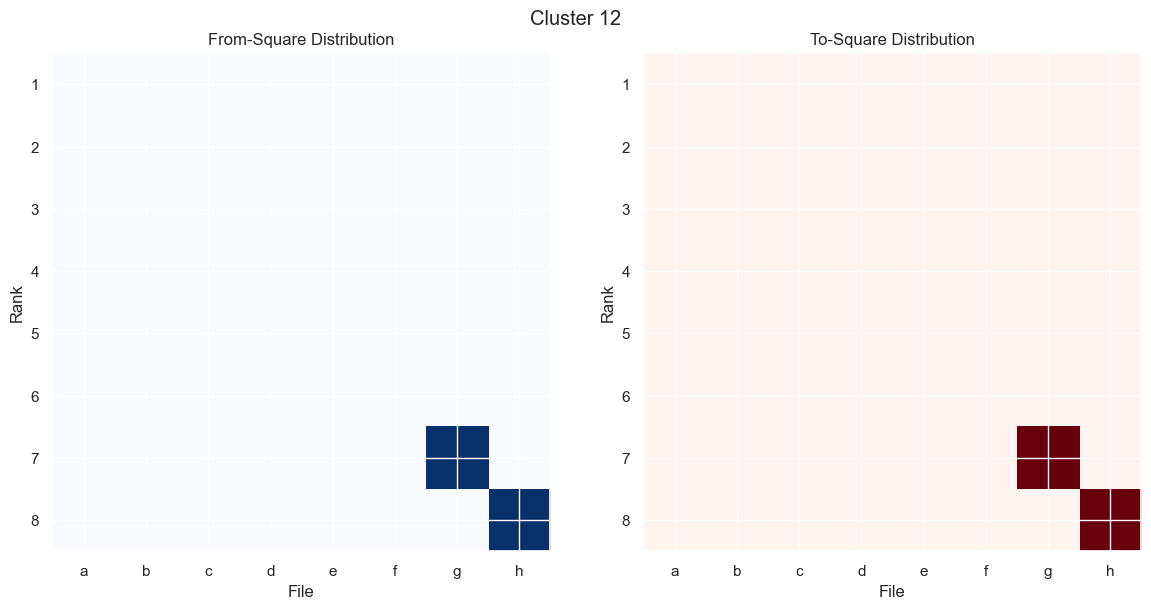

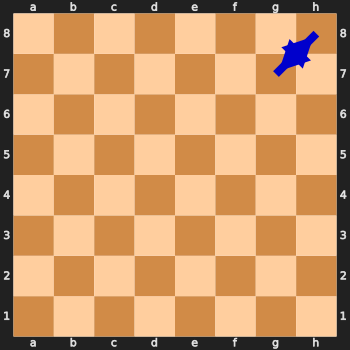

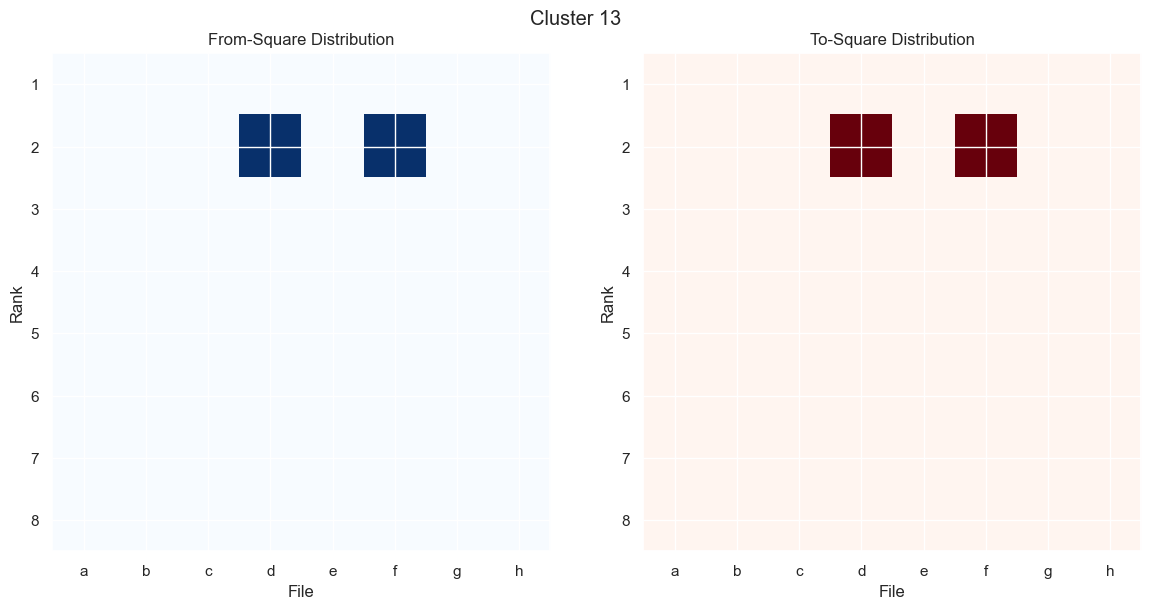

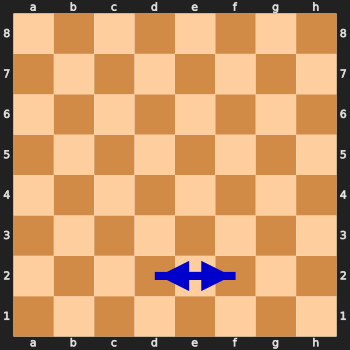

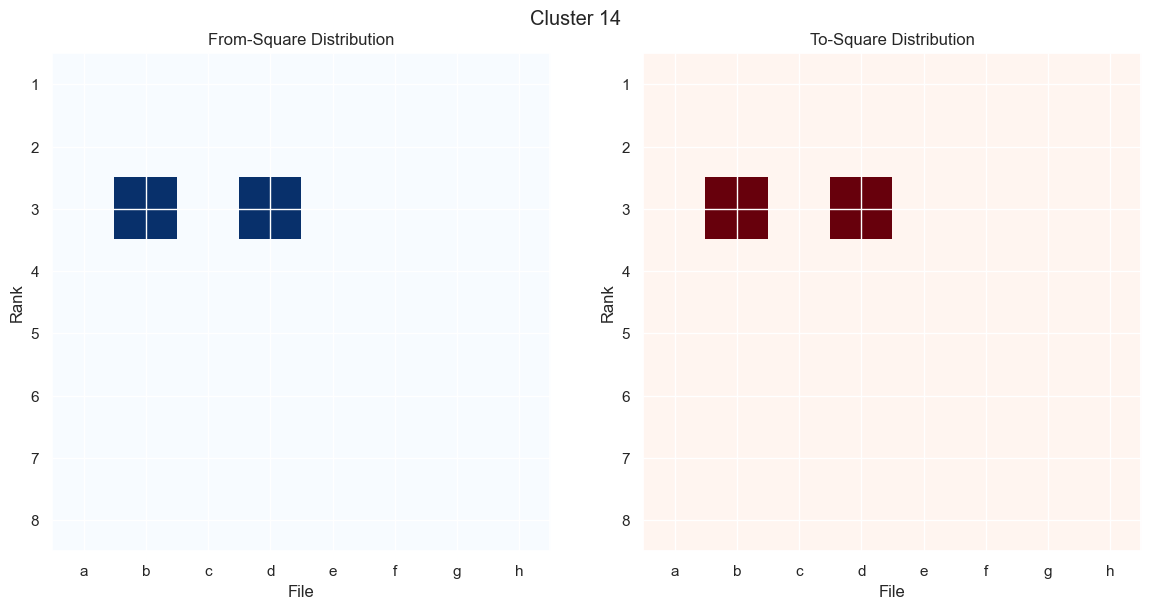

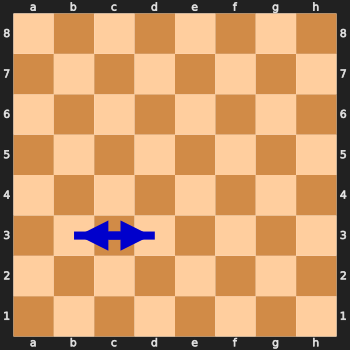

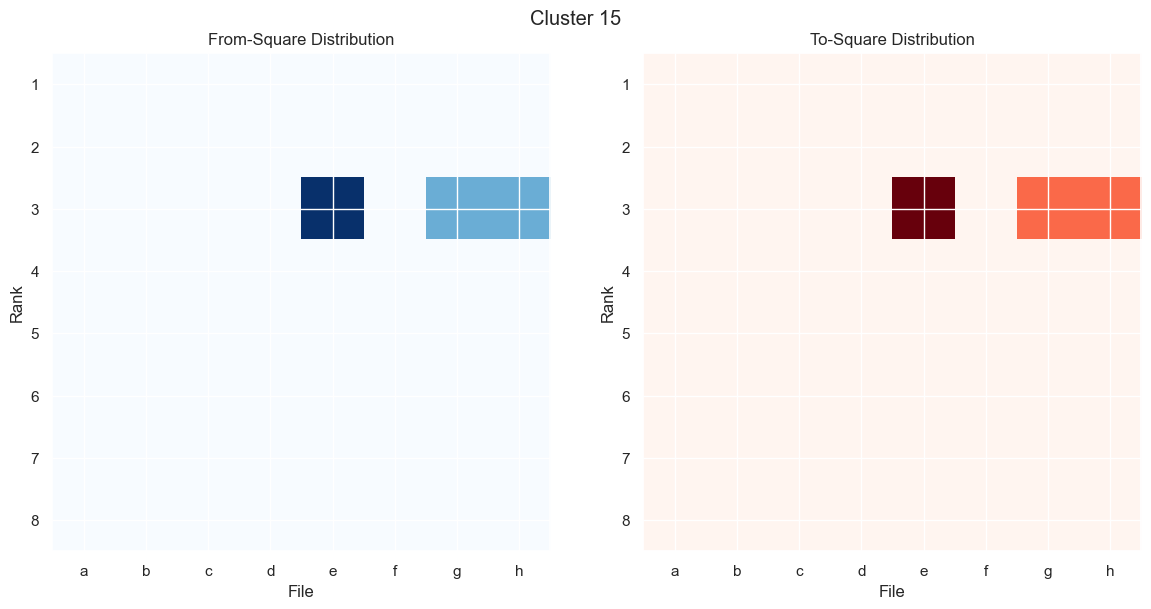

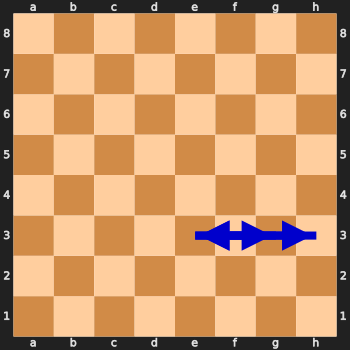

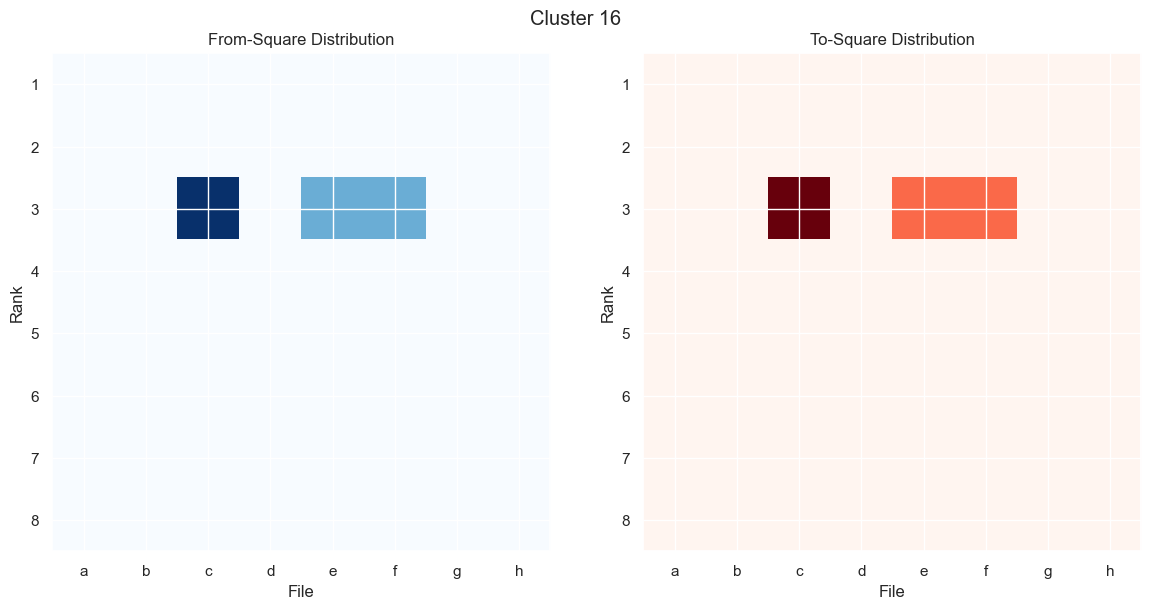

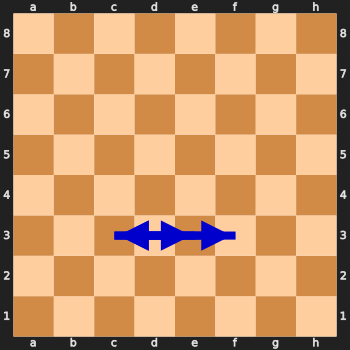

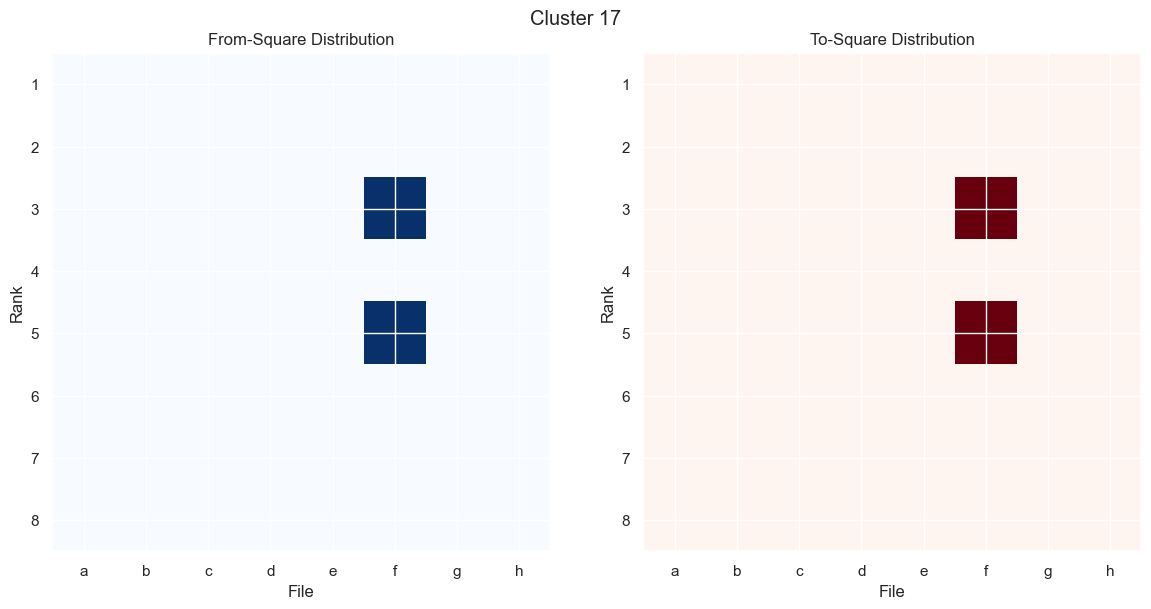

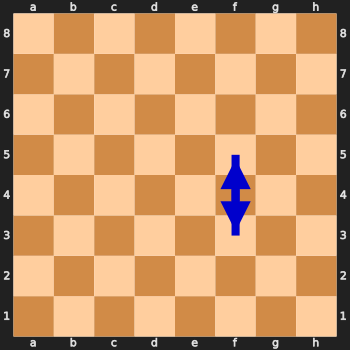

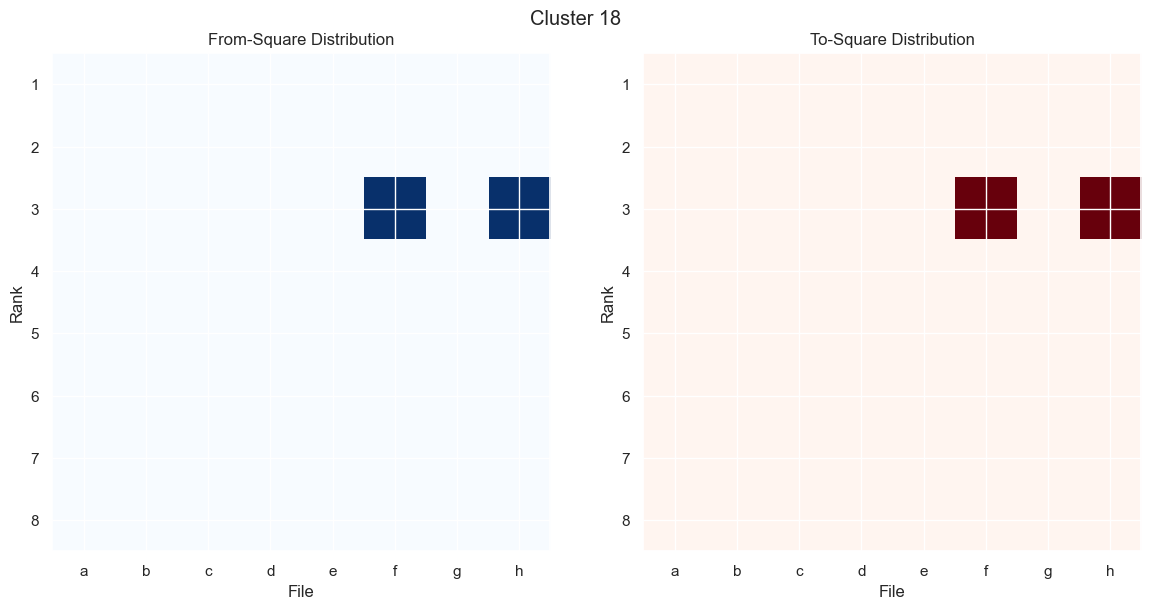

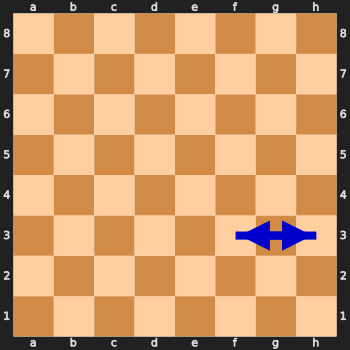

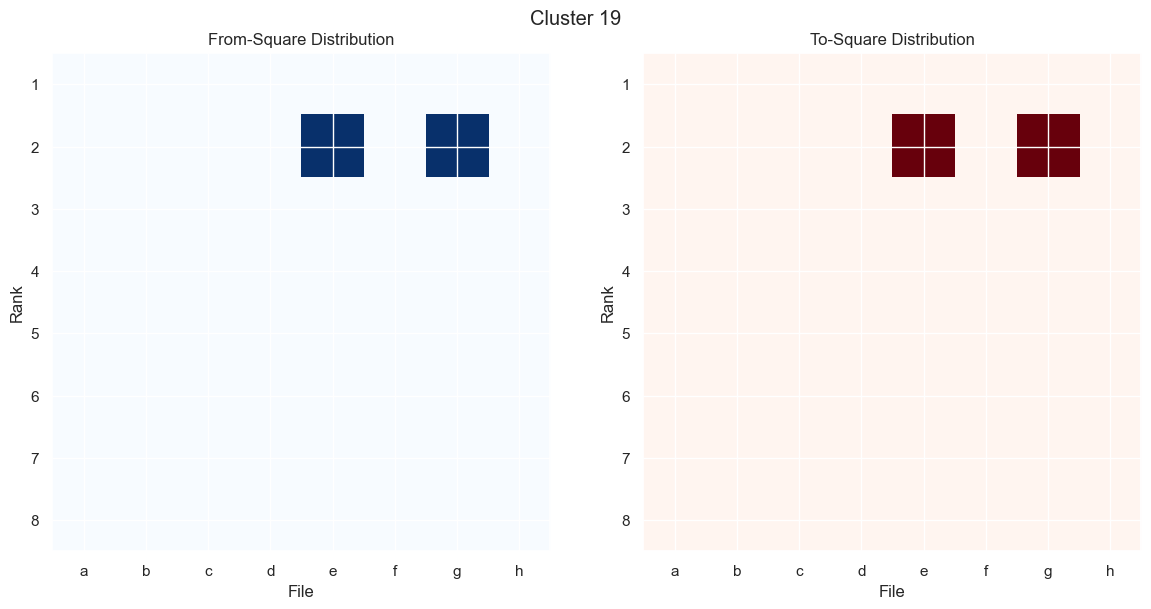

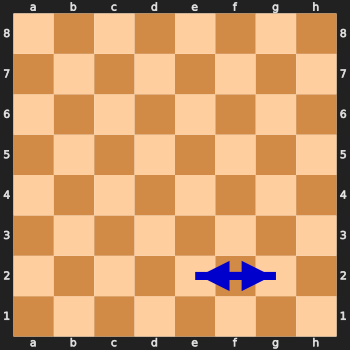

In [197]:
#Plot the clusters using the move plotter
for i in range(-1, maxCluster + 1):
    clusterMoves = dictionaty[clusters == i]
    movePlotter = MovePlotter(title=f'Cluster {i}')
    for move in clusterMoves:
        movePlotter.addMove(move)
    movePlotter.plot()

For n_clusters = 2, the silhouette score is: 0.0944
For n_clusters = 3, the silhouette score is: 0.0804
For n_clusters = 4, the silhouette score is: 0.0696
For n_clusters = 5, the silhouette score is: 0.0648
For n_clusters = 6, the silhouette score is: 0.0640
For n_clusters = 7, the silhouette score is: 0.0635
For n_clusters = 8, the silhouette score is: 0.0610
For n_clusters = 9, the silhouette score is: 0.0558
For n_clusters = 10, the silhouette score is: 0.0561
For n_clusters = 11, the silhouette score is: 0.0581
For n_clusters = 12, the silhouette score is: 0.0574
For n_clusters = 13, the silhouette score is: 0.0560
For n_clusters = 14, the silhouette score is: 0.0539
For n_clusters = 15, the silhouette score is: 0.0538
For n_clusters = 16, the silhouette score is: 0.0543
For n_clusters = 17, the silhouette score is: 0.0585
For n_clusters = 18, the silhouette score is: 0.0591
For n_clusters = 19, the silhouette score is: 0.0532
For n_clusters = 20, the silhouette score is: 0.0524
F

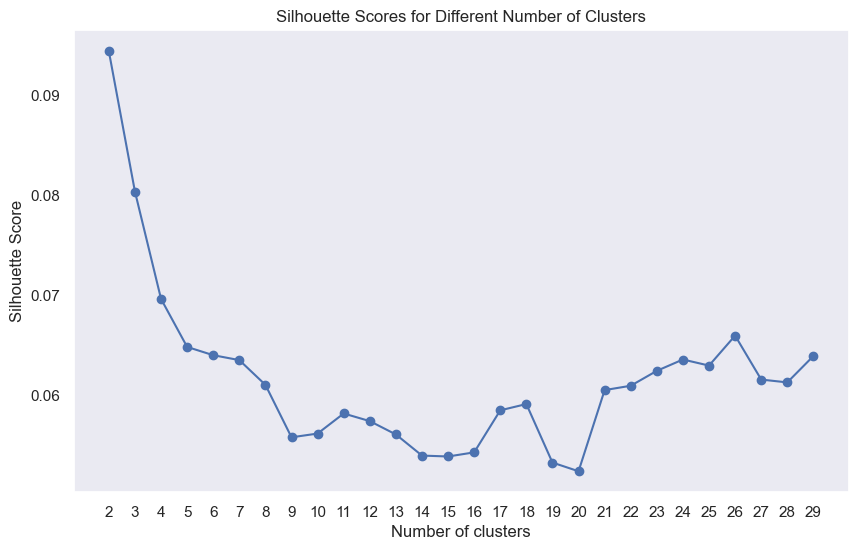

In [198]:
#Cluster with Kmean with elbow method with cosine distance

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

# Compute the cosine distance matrix
cosine_distance_matrix = pairwise_distances(wordVectors, metric='cosine')
# Compute the silhouette scores for different values of k
silhouette_scores = []
range_n_clusters = range(2, 30)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(cosine_distance_matrix)
    silhouette_avg = silhouette_score(cosine_distance_matrix, cluster_labels, metric='precomputed')
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

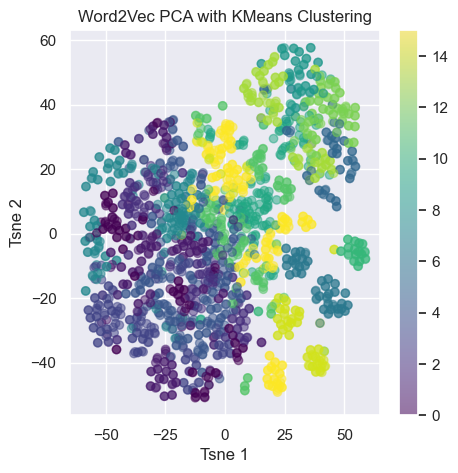

In [199]:
#KMeans clustering with the best number of clusters
best_n_clusters = 16

kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
kmeans.fit(wordVectors)
clusters = kmeans.labels_

#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.title('Word2Vec PCA with KMeans Clustering')
plt.xlabel('Tsne 1')
plt.ylabel('Tsne 2')
plt.colorbar()
plt.show()

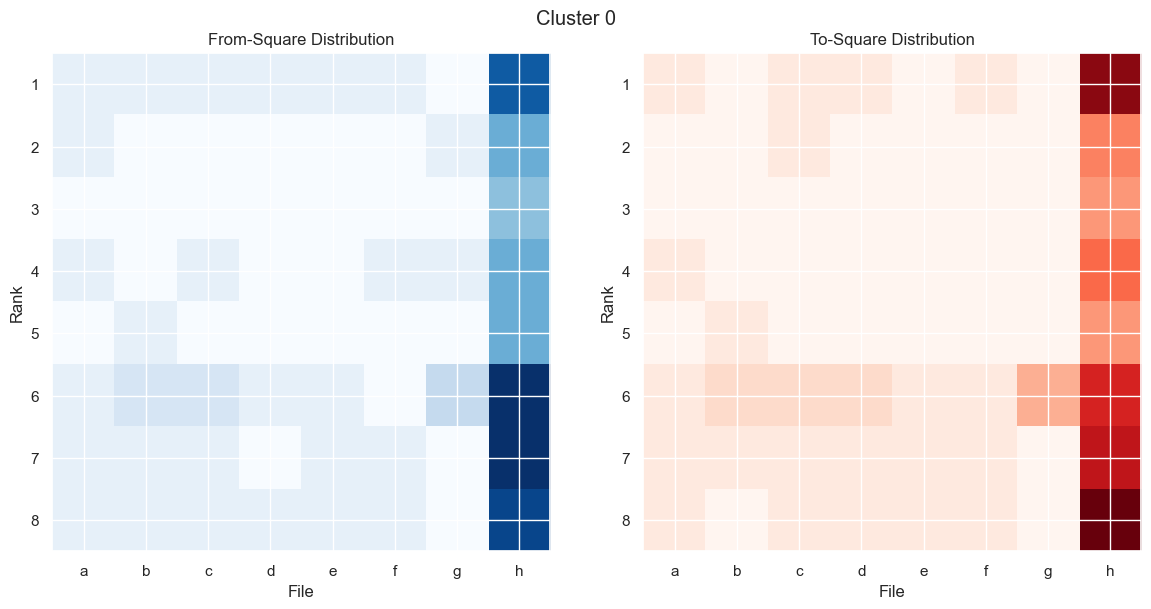

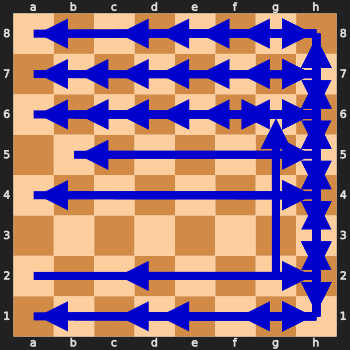

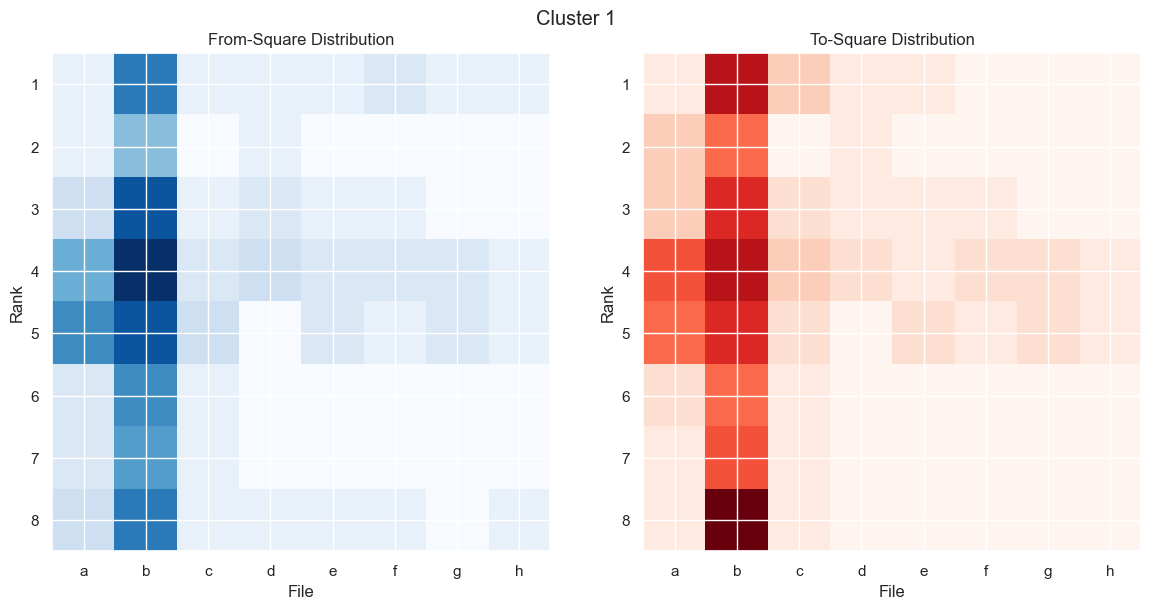

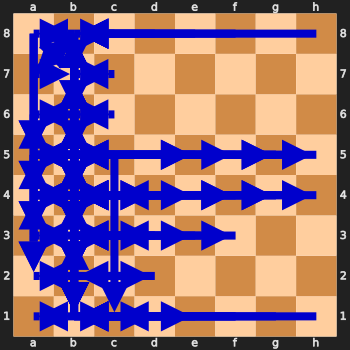

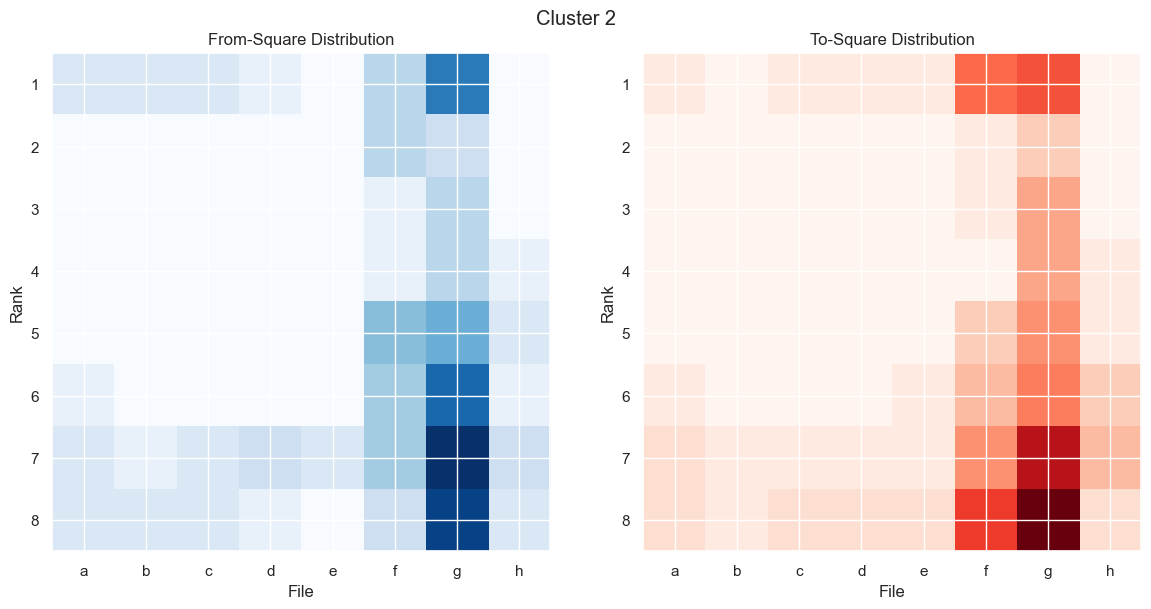

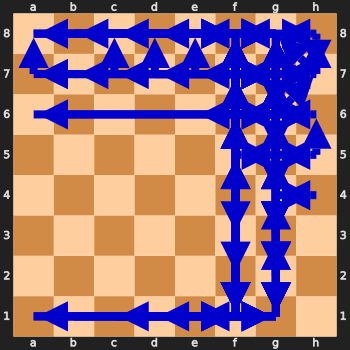

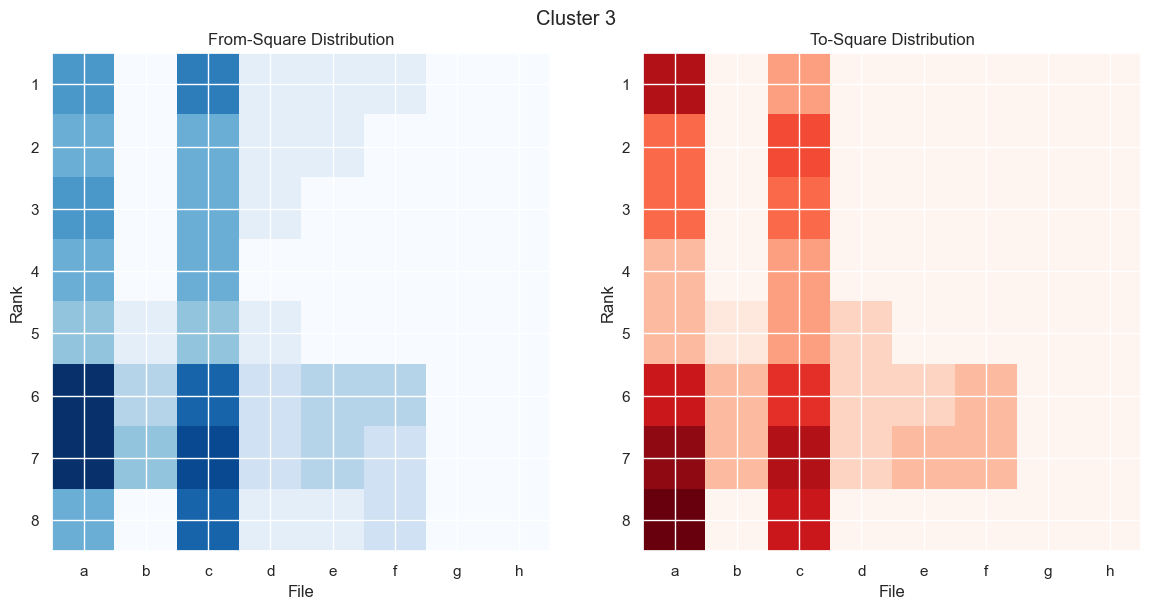

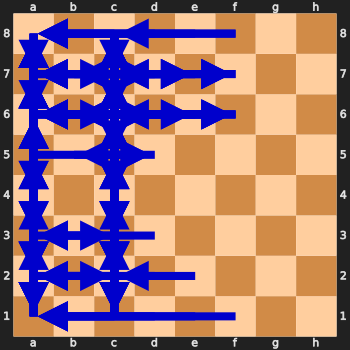

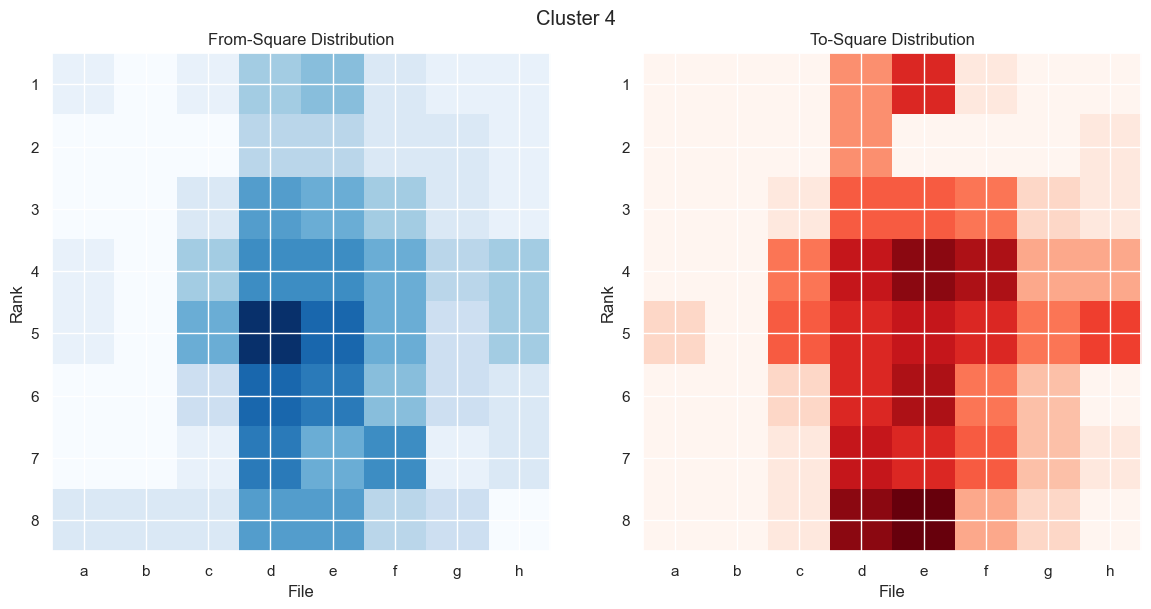

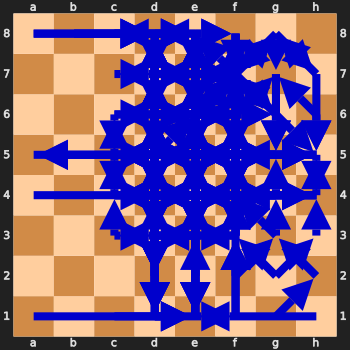

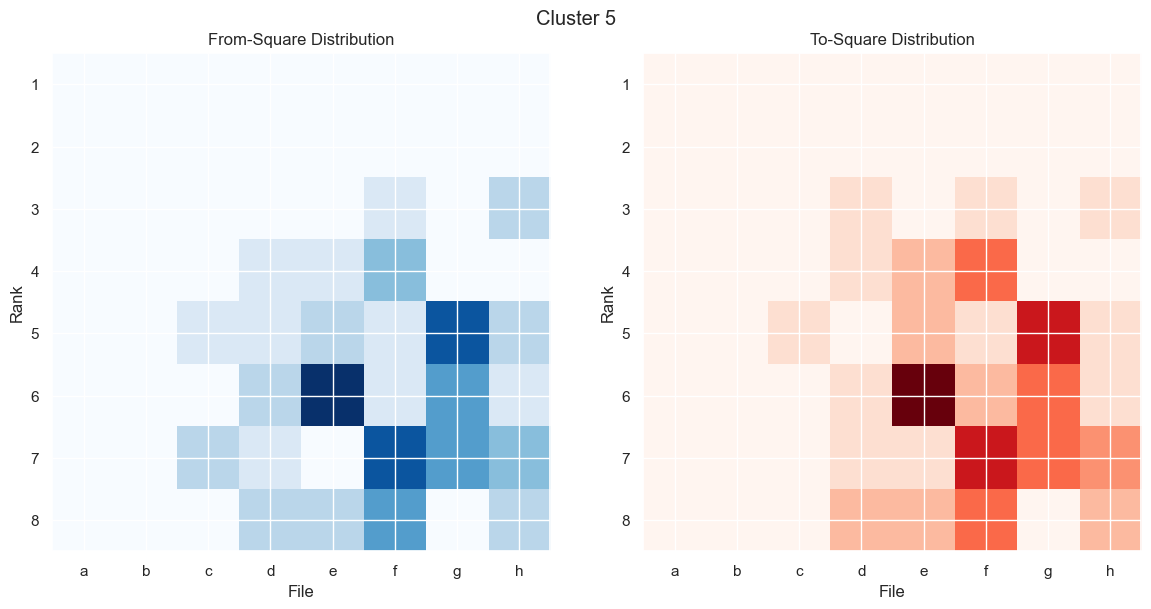

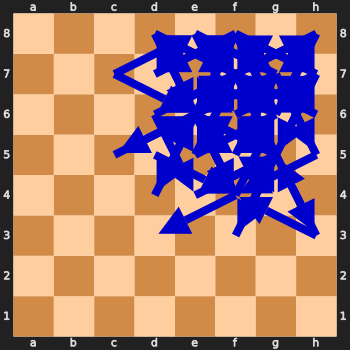

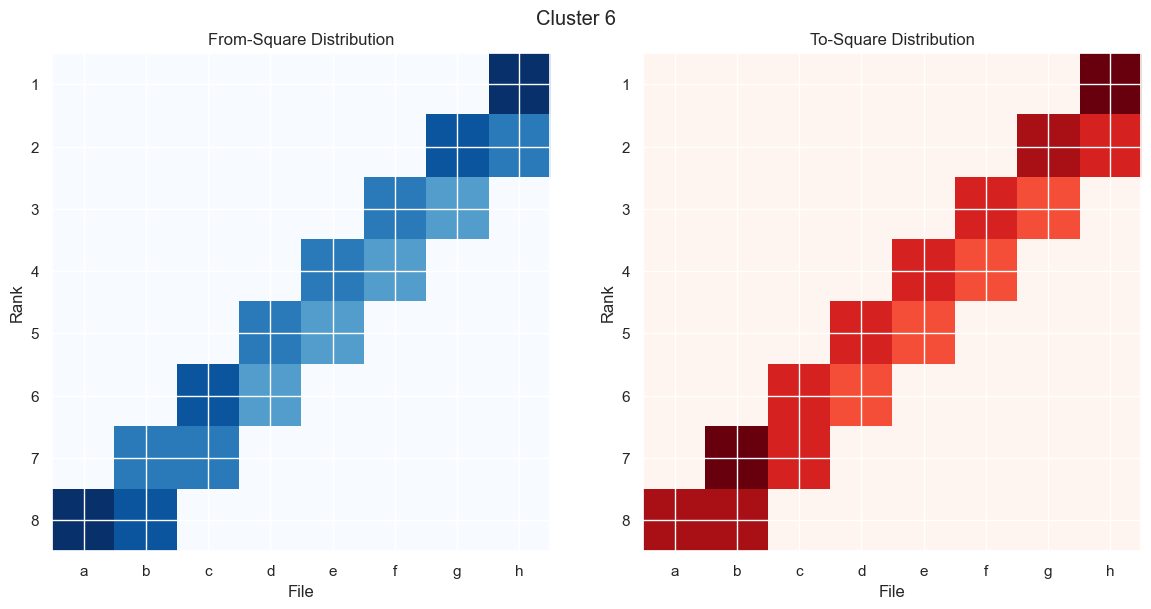

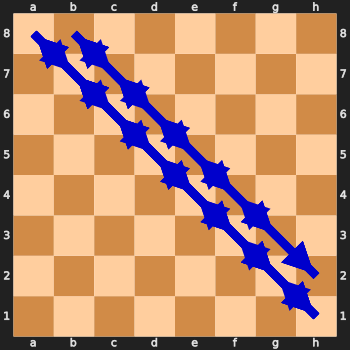

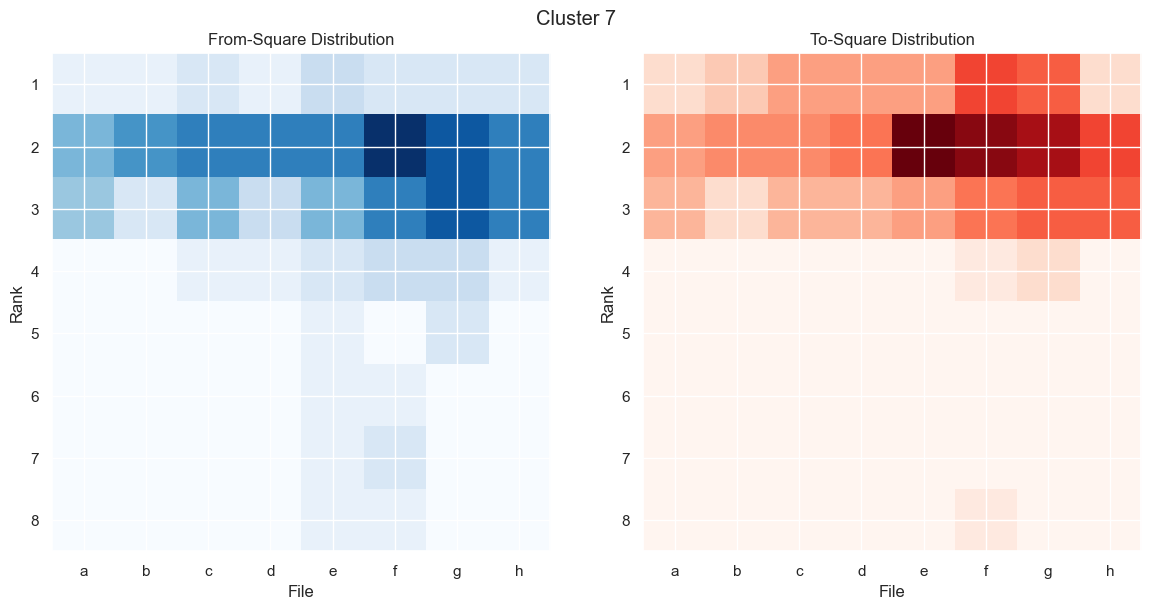

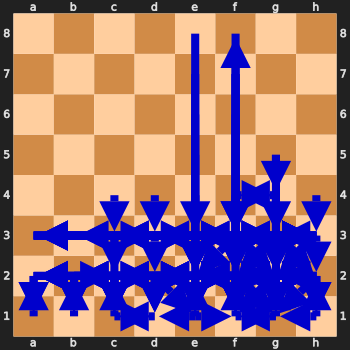

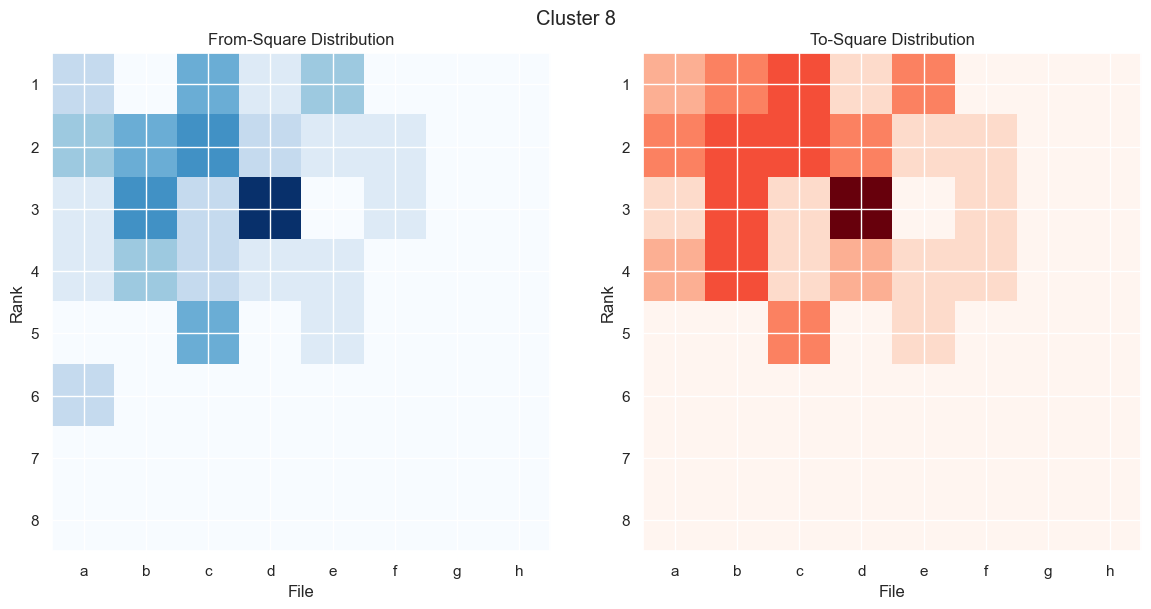

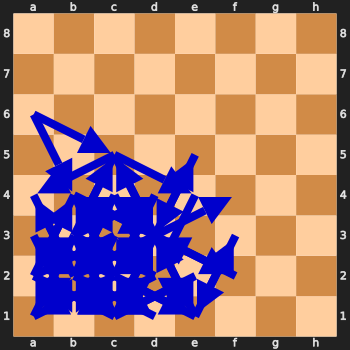

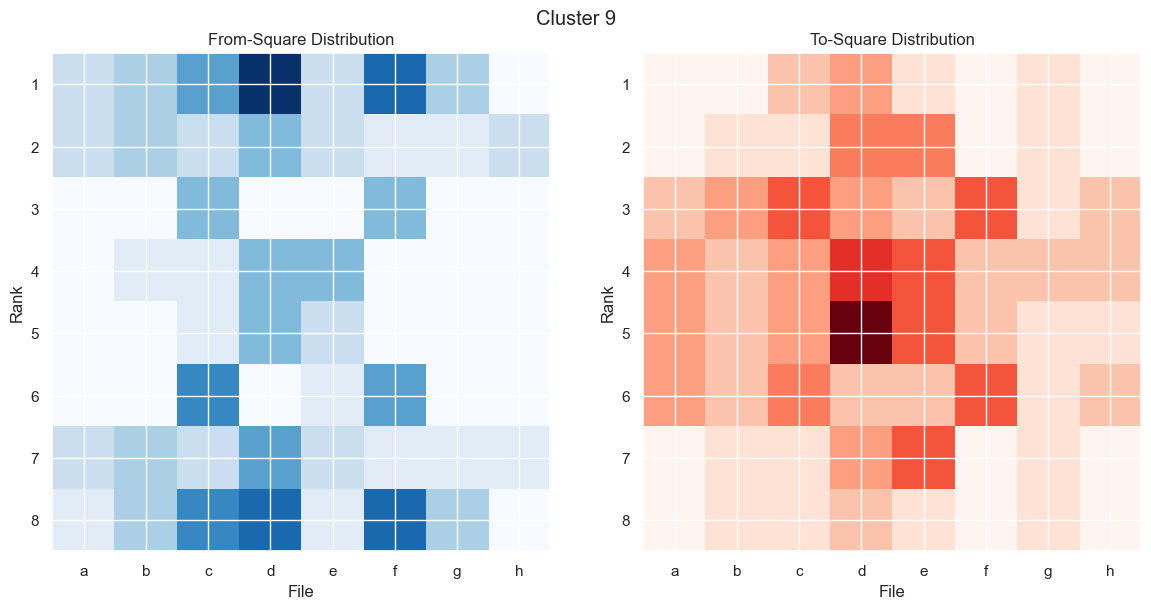

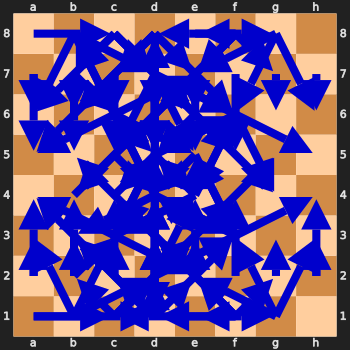

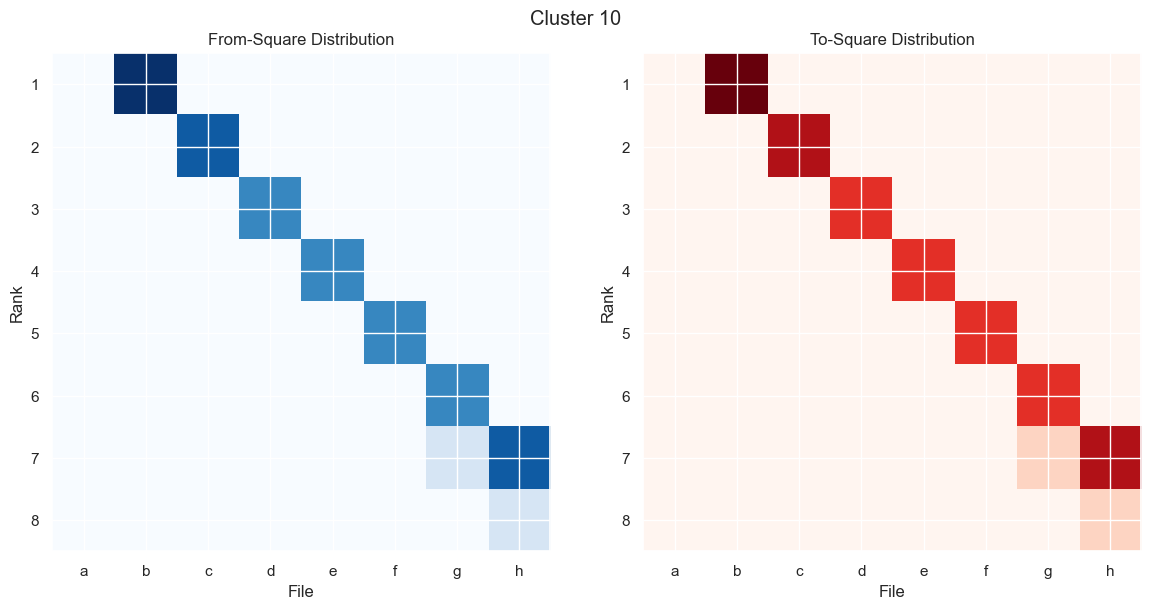

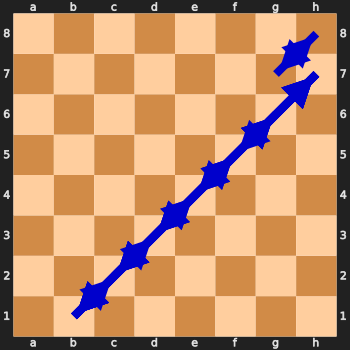

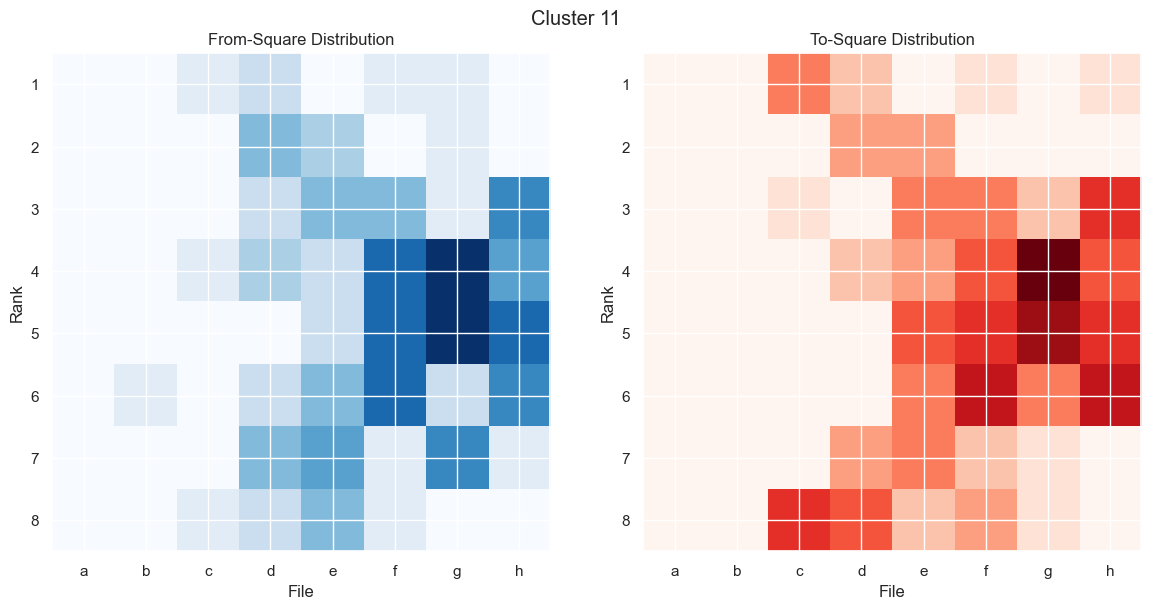

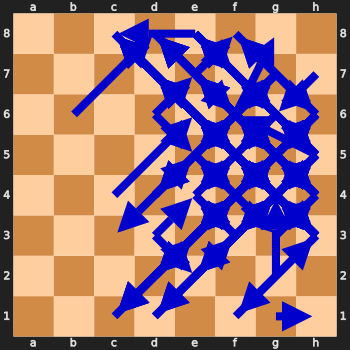

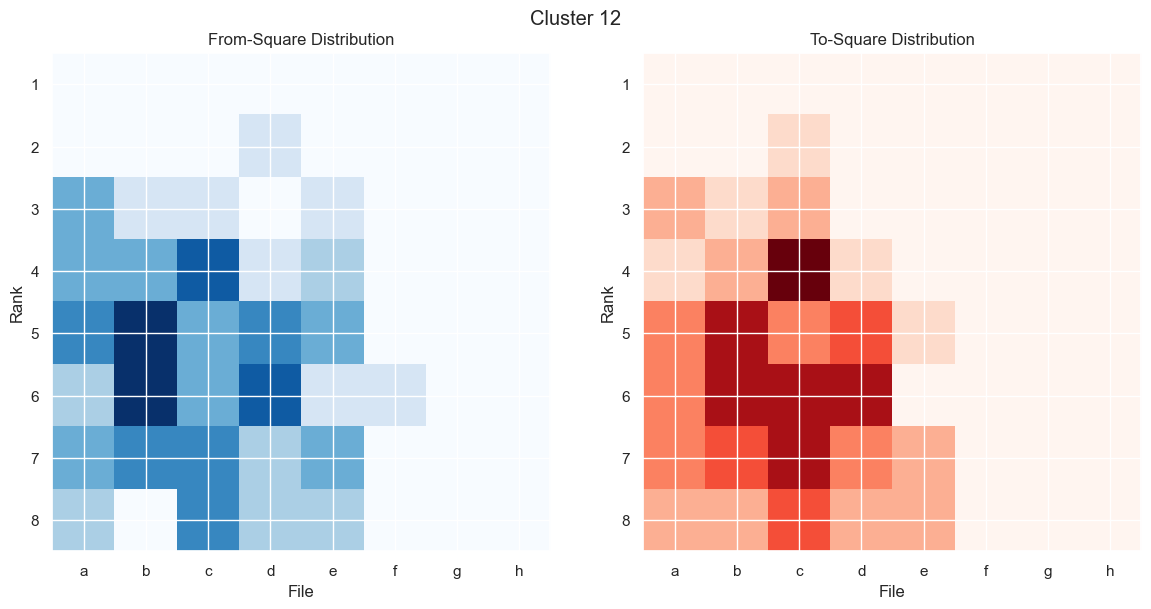

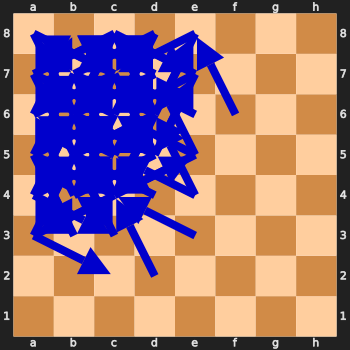

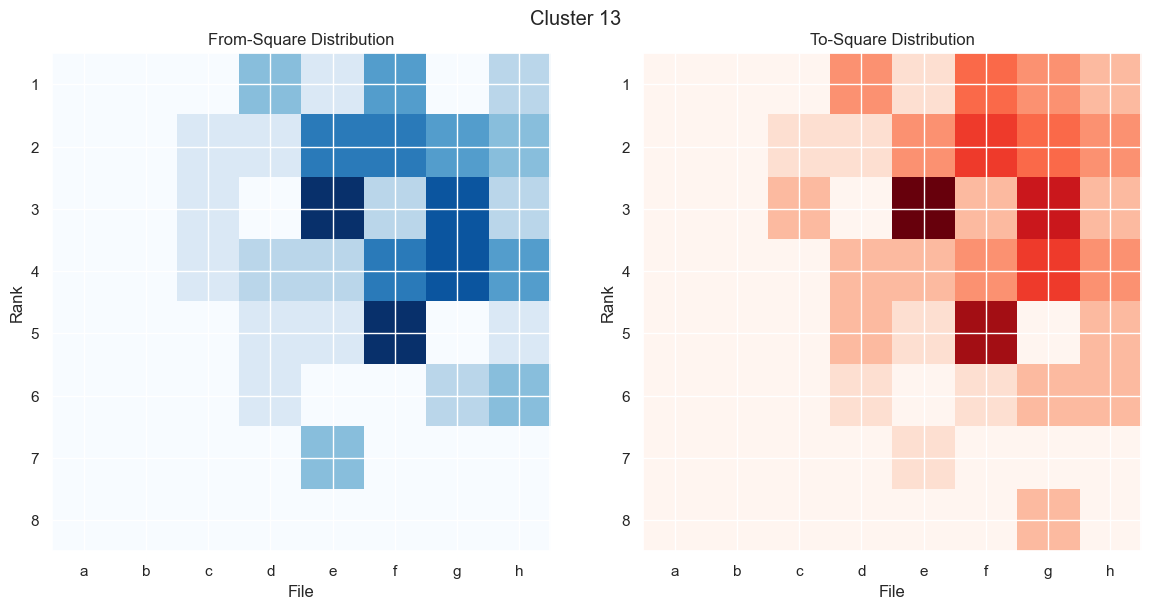

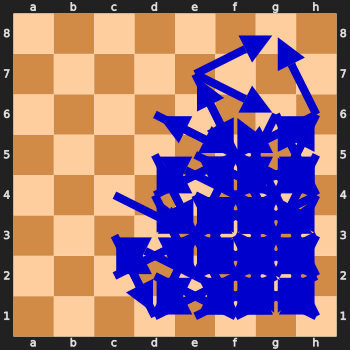

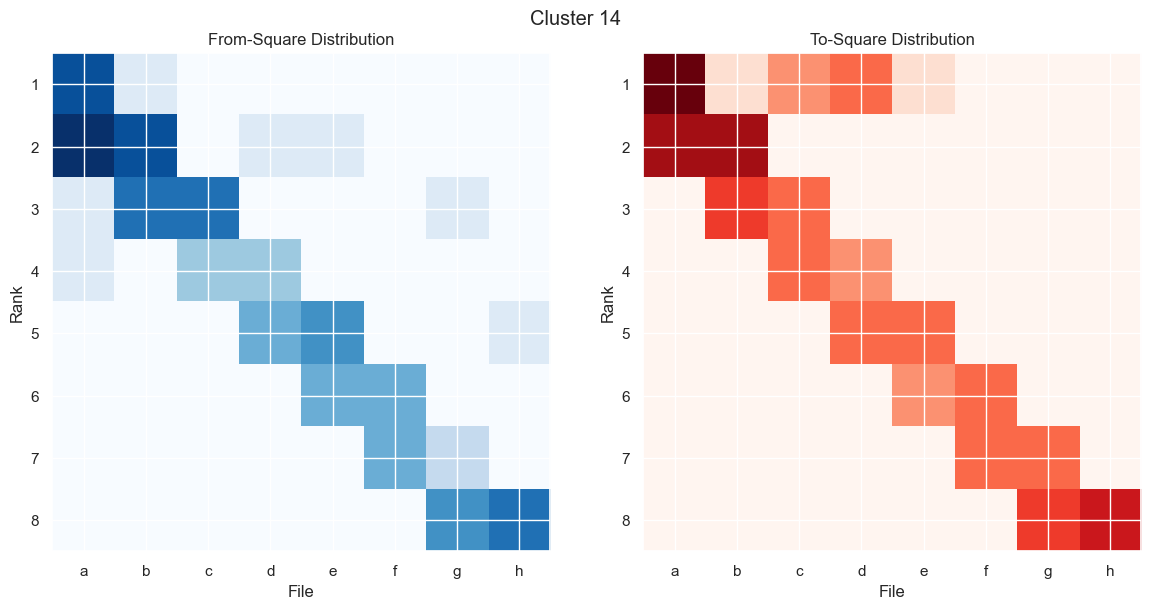

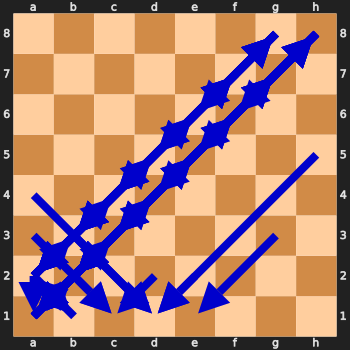

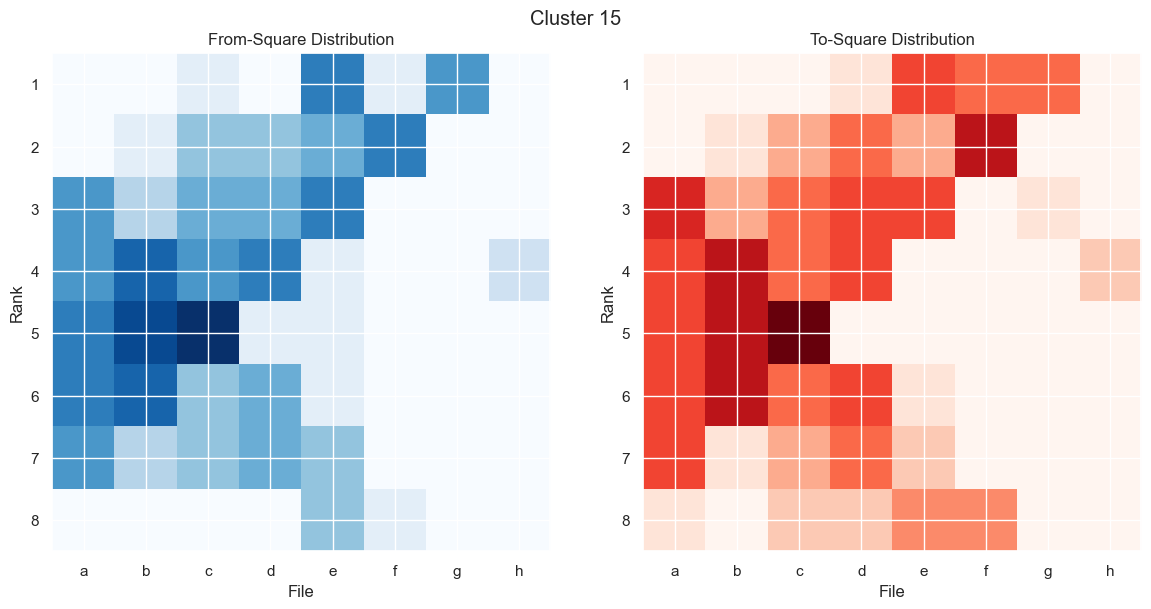

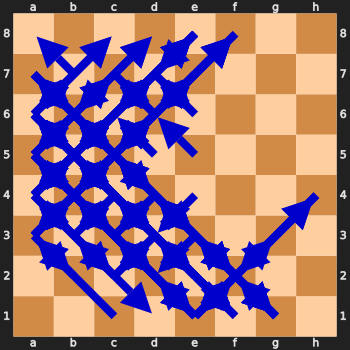

In [200]:
#plot the clusters using the move plotter
for i in range(best_n_clusters):
    clusterMoves = dictionaty[clusters == i]
    movePlotter = MovePlotter(title=f'Cluster {i}')
    for move in clusterMoves:
        movePlotter.addMove(move)
    movePlotter.plot()